# Ha+NII/ OIII Metallicity Diagnostic APJ Figures

In [1]:
import astropy.io
from astropy.io import fits
from astropy.table import vstack, Table
import dust_extinction
from astropy.modeling.models import BlackBody
import astropy.units as u
from dust_extinction.parameter_averages import F19
#import astroquery
import numpy as np
from numpy.polynomial.polynomial import polyfit
from numpy.polynomial.polynomial import Polynomial as Poly
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from io import StringIO 
import csv
import scipy.stats as stats
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#import sys
#locate_python = sys.exec_prefix
#print(locate_python)

# Data Files

['SPECOBJID', 'RELIABLE', 'PLATEID', 'MJD', 'FIBERID', 'PHOTOID', 'RA', 'DEC', 'PLUG_MAG', 'PRIMTARGET', 'SECTARGET', 'TARGETTYPE', 'SPECTROTYPE', 'SUBCLASS', 'Z', 'Z_ERR', 'Z_WARNING', 'V_DISP', 'V_DISP_ERR', 'SN_MEDIAN', 'E_BV_SFD', 'ZTWEAK', 'ZTWEAK_ERR', 'SPECTRO_MAG', 'KCOR_MAG', 'KCOR_MODEL_MAG', 'RELEASE']


C:\Users\pheretz\AppData\Local\Temp\ipykernel_5720\2855903782.py:28: RuntimeWarning: invalid value encountered in true_divide
  OIII4363SDSStruedetect = np.where(OIII4363SDSS/OIII4363errSDSS >3)[0]


('RA', 'DEC', 'z', 'logM_p50', 'logM_p16', 'logM_p84', 'logSFR_p50', 'logSFR_p16', 'logSFR_p84', 'logOH_p50', 'logOH_p16', 'logOH_p84', 'logsSFR_p50', 'logsSFR_p16', 'logsSFR_p84')
('RA', 'DEC', 'z', 'OII_3726', 'OII_3726_err', 'OII_3729', 'OII_3729_err', 'Hb', 'Hb_err', 'OIII_4959', 'OIII_4959_err', 'OIII_5007', 'OIII_5007_err', 'NII_6548', 'NII_6548_err', 'Ha', 'Ha_err', 'NII_6584', 'NII_6584_err', 'SII_6717', 'SII_6717_err', 'SII_6731', 'SII_6731_err', 'oii', 'oiii', 'ha_nii', 'tau', 'EW_ha', 'EW_ha_err')
9.165737847924797
0.4553153753701578


C:\Users\pheretz\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\pheretz\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\pheretz\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


1824
['phot_id', 'ra', 'dec', 'x', 'y', 'grism_id', 'ifield', 'field', 'pointings', 'npoint', 'jh_mag', 'z_spec', 'z_peak_phot', 'z_phot_l95', 'z_phot_l68', 'z_phot_u68', 'z_phot_u95', 'z_max_grism', 'z_peak_grism', 'z_grism_l95', 'z_grism_l68', 'z_grism_u68', 'z_grism_u95', 'f_cover', 'f_flagged', 'max_contam', 'int_contam', 'f_negative', 'flag1', 'flag2', 'use_zgrism', 'use_phot', 'z_best_s', 'z_best', 'z_best_l95', 'z_best_l68', 'z_best_u68', 'z_best_u95', 'number', 'linefit_grism_id', 'linefit_jh_mag', 'linefit_z_max_grism', 's0', 's0_err', 's1', 's1_err', 'Lya_FLUX', 'Lya_FLUX_ERR', 'Lya_SCALE', 'Lya_EQW', 'Lya_EQW_ERR', 'CIV_FLUX', 'CIV_FLUX_ERR', 'CIV_SCALE', 'CIV_EQW', 'CIV_EQW_ERR', 'MgII_FLUX', 'MgII_FLUX_ERR', 'MgII_SCALE', 'MgII_EQW', 'MgII_EQW_ERR', 'OII_FLUX', 'OII_FLUX_ERR', 'OII_SCALE', 'OII_EQW', 'OII_EQW_ERR', 'Hd_FLUX', 'Hd_FLUX_ERR', 'Hd_SCALE', 'Hd_EQW', 'Hd_EQW_ERR', 'Hg_FLUX', 'Hg_FLUX_ERR', 'Hg_SCALE', 'Hg_EQW', 'Hg_EQW_ERR', 'OIIIx_FLUX', 'OIIIx_FLUX_ERR', 'OII

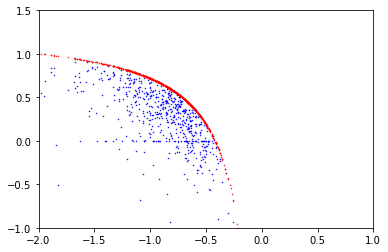

In [2]:
# Data files

## SDSS
#SSDS galaxy data from: https://www.sdss3.org/dr8/spectro/galspec.php

# windows file path format: pd.read_csv(r"C:\Users\pheretz\Desktop\URSI_Internship\Sources Info Sheet - Catalog (8.26).csv")

#import fits data:
galSpecInfo = fits.open(r"C:\Users\pheretz\CfA Metallicity\galSpecInfo-dr8.fits",memmap=True)
#galSpecInfo
Infocols = galSpecInfo[1].columns
Infocols.names
print(Infocols.names)
SpecInfodata = galSpecInfo[1].data
#SpecInfodata = pd.DataFrame(SpecInfodata)
#print(SpecInfodata)

galSpecLine = fits.open(r"C:\Users\pheretz\CfA Metallicity\galSpecLine-dr8.fits",memmap=True)
Linecols = galSpecLine[1].columns
Linecols.names
#print(Linecols.names)
SDSSSpecLinedata = galSpecLine[1].data
OIII4363SDSS = SDSSSpecLinedata['OIII_4363_FLUX']
OIII4363errSDSS = SDSSSpecLinedata['OIII_4363_FLUX_ERR']
## 602,494 galaxies with detections
OIII4363SDSSdetect = np.where(OIII4363SDSS >0)[0]
## 33,202 galaxies with s/n greater than 3
OIII4363SDSStruedetect = np.where(OIII4363SDSS/OIII4363errSDSS >3)[0]
#print(len(OIII4363SDSS))
#print(len(OIII4363SDSStruedetect))

galSpecExtra = fits.open(r"C:\Users\pheretz\CfA Metallicity\galSpecExtra-dr8.fits",memmap=True)
Linecols2 = galSpecExtra[1].columns
Linecols2.names
#print(Linecols2.names)
SDSSSpecExtradata = galSpecExtra[1].data
#SDSSSpecExtradata = pd.DataFrame(SDSSSpecExtradata)


## BATTISTI SDSS DATA
# source paper: https://ui.adsabs.harvard.edu/abs/2022MNRAS.513.4431B/abstract

#import dat files:
BattistiSpecLine = np.genfromtxt('SDSS_DR7_sfg_lines.dat', names=True)
BattistiSpecProp = np.genfromtxt('SDSS_DR7_sfg_prop.dat', names=True)
#see column names:
print(BattistiSpecProp.dtype.names)
#print(BattistiSpecProp[5])
print(BattistiSpecLine.dtype.names)
# Stellar mass
w = np.where(BattistiSpecProp['logM_p50']>0)[0]  
#print(min(BattistiSpecProp['logM_p50'][w]))
#print(max(BattistiSpecProp['logM_p50'][w]))
print(sum(BattistiSpecProp['logM_p50'][w])/len(BattistiSpecProp['logM_p50'][w]))
# SFR
w = np.where(BattistiSpecProp['logSFR_p50']>0)[0]  
#print(min(BattistiSpecProp['logSFR_p50'][w]))
#print(max(BattistiSpecProp['logSFR_p50'][w]))
print(sum(BattistiSpecProp['logSFR_p50'][w])/len(BattistiSpecProp['logSFR_p50'][w]))

## MAPPINGS
BPASS = np.genfromtxt('grid_bpass_P6.csv',names=True,delimiter=",", dtype=str)
#display(BPASS)
#BPASScols = BPASS.columns
#print(BPASS.dtype.names)

## MOSDEF!!
# corrected data, balmer lines are corrected for stellar absorption
MOSDEFlines = fits.open('linemeas_cor.fits',memmap=True)
MOSDEFLinecols = MOSDEFlines[1].columns
#print(MOSDEFLinecols.names)
MOSDEFdata = MOSDEFlines[1].data
MOSDEFdata = pd.DataFrame(MOSDEFdata)

## MOSDEF Lines 
# recommend using the preferred flux, ** already corrected for s/n > 3**
# OIII doublet
OIII5008_MOSDEF = MOSDEFdata['OIII5008_PREFERREDFLUX']
OIII4960_MOSDEF = MOSDEFdata['OIII4960_PREFERREDFLUX']
### THIS IS THE AURORAL LINE!!! :D
OIII4364_MOSDEF = MOSDEFdata['OIII4364_PREFERREDFLUX']
OIII4364detect = np.where(OIII4364_MOSDEF >0)[0]
#print(len(OIII4364detect))
Ha_MOSDEF = MOSDEFdata['HA6565_PREFERREDFLUX']
Hb_MOSDEF = MOSDEFdata['HB4863_PREFERREDFLUX']
NII85_MOSDEF = MOSDEFdata['NII6585_PREFERREDFLUX']
NII50_MOSDEF = MOSDEFdata['NII6550_PREFERREDFLUX']

#MOSDEFdata = MOSDEFdata.loc[(OIII5008_MOSDEF>0)& (OIII4960_MOSDEF>0) &( Ha_MOSDEF >0)&(Hb_MOSDEF>0)&(NII85_MOSDEF>0)&(NII50_MOSDEF>0)]

# try to segment star-forming
#MOSDEFstarform = np.where( (OIII5008_MOSDEF>0)& (OIII4960_MOSDEF>0) &( Ha_MOSDEF >0)&(Hb_MOSDEF>0)&(NII85_MOSDEF>0)&(NII50_MOSDEF>0))
#MOSDEFstarform = MOSDEFdata.loc[(np.log10((OIII5008_MOSDEF /Hb_MOSDEF ))>((0.61/(np.log10((NII85_MOSDEF/Ha_MOSDEF))-0.05))+1.3))]#&((NII85_MOSDEF/Ha_MOSDEF)>0)]
MOSDEFstarform = MOSDEFdata.mask(np.log10((OIII5008_MOSDEF /Hb_MOSDEF ))>((0.61/(np.log10((NII85_MOSDEF/Ha_MOSDEF))-0.05))+1.3))
MOSDEFstarform = MOSDEFstarform.mask(np.log10((NII85_MOSDEF/Ha_MOSDEF))>0)
MOSDEFstarform_top = MOSDEFstarform.head(0)

#print(MOSDEFstarform.columns.values)

# uncorrected lines
OII3727_MOSDEF = MOSDEFstarform['OII3727_PREFERREDFLUX']
OII3730_MOSDEF = MOSDEFstarform['OII3730_PREFERREDFLUX_ERR']
OIII5008_MOSDEF = MOSDEFstarform['OIII5008_PREFERREDFLUX']
print(len(MOSDEFstarform['OIII5008_PREFERREDFLUX']))
OIII4960_MOSDEF = MOSDEFstarform['OIII4960_PREFERREDFLUX']
OIII_MOSDEF = OIII5008_MOSDEF + OIII4960_MOSDEF 
Ha_MOSDEF = MOSDEFstarform['HA6565_PREFERREDFLUX']
Hb_MOSDEF = MOSDEFstarform['HB4863_PREFERREDFLUX']
NII85_MOSDEF = MOSDEFstarform['NII6585_PREFERREDFLUX']
NII50_MOSDEF = MOSDEFstarform['NII6550_PREFERREDFLUX']
NII_MOSDEF = NII85_MOSDEF + NII50_MOSDEF
SII18_MOSDEF = MOSDEFstarform['SII6718_PREFERREDFLUX']
SII33_MOSDEF = MOSDEFstarform['SII6733_PREFERREDFLUX']
SII_MOSDEF = SII18_MOSDEF + SII33_MOSDEF

## Test what's going on w MOSDEF w a BPT
# not dust-corrected
x1 = np.log10((NII85_MOSDEF/Ha_MOSDEF))
y1 = np.log10((OIII5008_MOSDEF /Hb_MOSDEF ))
# Kewley 2001 line:
# log(OIII/Hb) = (0.61/(log(NII/Ha)-.47))+1.19
# Kauffman line
kauffline = (0.61/(x1-0.05))+1.3

#Plot
plt.scatter(x1,y1,s=1, c='b', marker='.')
plt.scatter(x1,kauffline ,s=1, c='r', marker='.')
plt.xlim([-2,1])
plt.ylim([-1,1.5])
#plt.xlabel("Log([NII]/Halpha)")
#plt.ylabel("Log([OIII]/Hbeta)")
#plt.text(0,1,"Uncorrected dust")
#plt.show()

#### MOSDEF STATS ####
# 1824 total galaxies
# 414 with a 4364 detection

### 3D HST for classification?
# corrected data, balmer lines are corrected for stellar absorption
HSTdata = fits.open('3dhst.v4.1.5.master.fits')#,memmap=True)
HSTdatacols = HSTdata[1].columns
print(HSTdatacols.names)
HSTdata = pd.DataFrame(HSTdata)

# No agn markers. 
# Pipit suggests that I use the method from SDSS but can't find

## Redshift
# each line has a calculated redshift. Which one to use? maybe OIII 5007 because bright and isolated?
OIIz = MOSDEFdata['OII3727_Z']
OIII5008z = MOSDEFstarform['OIII5008_Z']
#print (np.sum(OIII5008z)/(len(OIII5008z)))

#print(MOSDEFdata['NII6550_Z'][22])
#print(MOSDEFdata['OIII5008_Z'][22])

#print(OII3727_MOSDEF)

## Merge 3D HST and MOSDEF dataframes by id
HSTdata = HSTdata.rename({'ra':'RA'}, axis='columns')
#HST_MOSDEF = pd.merge(HSTdata,MOSDEFstarform, 
#                   on='ID',how='outer')
#print(HSTdata.columns.values)

# Dust Extinction

In [3]:
## Dust Extinction 

# Correcting for dust in each galaxy, based off of F19 model of MW dust extinction 
# See this doc for more information 
# https://docs.google.com/document/d/1DAK7oo5JPau576Z7sWnu0bUdTS8y4rS92MxC76ky0xQ/edit?usp=sharing

# Battisti SDSS data values, uncorrected
OIII5007_Batt = BattistiSpecLine['OIII_5007']
OIII4959_Batt = BattistiSpecLine['OIII_4959']
OIII_Batt = BattistiSpecLine['OIII_5007'] + BattistiSpecLine['OIII_4959']
Hbeta_Batt = BattistiSpecLine['Hb']
NII48_Batt = BattistiSpecLine['NII_6548']
NII84_Batt = BattistiSpecLine['NII_6584']
NII_Batt = NII48_Batt + NII84_Batt
Halpha_Batt = BattistiSpecLine['Ha']
SII17_Batt = BattistiSpecLine['SII_6717']
SII31_Batt = BattistiSpecLine['SII_6731']
SII_Batt = BattistiSpecLine['SII_6717'] + BattistiSpecLine['SII_6731']
OII26_Batt = BattistiSpecLine['OII_3726']
OII29_Batt = BattistiSpecLine['OII_3729']
OII_Batt = BattistiSpecLine['OII_3726'] + BattistiSpecLine['OII_3729']
print(max(OII26_Batt))
print(min(OII26_Batt))
print(sum(OII26_Batt)/len((OII26_Batt)))
print(max(OII29_Batt))
print(min(OII29_Batt))
print('Avg OIII5007 unc: ',sum(OIII5007_Batt)/len((OIII5007_Batt)))
print('Median OII26 unc: ',np.median(OII26_Batt))


# Observed Ha/Hb ratio
Ha_Hb_obs = Halpha_Batt / Hbeta_Batt
# Intrinsic Ha/Hb ratio value, given to me by Andrew Battisti
Ha_Hb_int = 2.86

int_obs = Ha_Hb_int / Ha_Hb_obs
int_obsavg = np.sum(int_obs)/len(int_obs)
int_obs_max = np.max(int_obs)
int_obs_min = np.min(int_obs)
#print(int_obsavg)
#print(int_obs_max)
#print(int_obs_min)

# k values for each line in question
ext = F19(Rv=3.1)
# units in parentheses are: 1/wavelength(um) units 
# and we will assume Rv=3.1, which is the avg MW value.
k_Hb = ext(1/.48613)*3.1
k_Ha = ext(1/.65628)*3.1
#print(k_Ha) #looks good
#print(k_Hb) #looks good
k_OIII5007 = ext(1/.5007)*3.1
k_OIII4959 = ext(1/.4959)*3.1
k_NII84 = ext(1/.6584)*3.1
k_NII48 = ext(1/.6548)*3.1
k_SII17 = ext(1/.6717)*3.1
k_SII31 = ext(1/.6731)*3.1
k_OII26 = ext(1/.3726)*3.1
k_OII29 = ext(1/.3729)*3.1

## Color correction, E(B-V) = log10 ( (Ha/Hb)obs / (Ha/Hb)int ) / (0.4(k(Hb) - (k(Ha))))
EB_V = np.log10( Ha_Hb_obs / Ha_Hb_int ) / (0.4*(k_Hb - k_Ha))
#print(EB_V[44]) # looks good, Andrew says should be less than 0.9
#print(max(EB_V))
#print(min(EB_V))
# print("Average EBV",np.sum(EB_V)/len(EB_V))
# print("Max EBV",max(EB_V))
# print("Min EBV",min(EB_V))
# print(EB_V)

## Intrinsic flux, accounting for attenuation, Fint = Fatt * 10^ (0.4*k(lambda)*EB_V)
#Halpha_Batt_int = (pow(10,0.4*k_Ha*EB_V))*Halpha_Batt #10**(0.4*k_Ha*EB_V))
x = (pow(10,0.4*k_Ha*EB_V)) 
Halpha_Batt_int = x*Halpha_Batt
#cleanedList = [x for x in Halpha_Batt_int if (np.isnan(x) == False)]
#print(cleanedList)
Hbeta_Batt_int = (pow(10,0.4*k_Hb*EB_V))*Hbeta_Batt
OIII5007_Batt_int = (pow(10,0.4*k_OIII5007*EB_V))*OIII5007_Batt
OIII4959_Batt_int = (pow(10,0.4*k_OIII4959*EB_V))*OIII4959_Batt
OIII_Batt_int = OIII5007_Batt_int + OIII4959_Batt_int
NII84_Batt_int = (pow(10,0.4*k_NII84*EB_V))*NII84_Batt
NII48_Batt_int = (pow(10,0.4*k_NII48*EB_V))*NII48_Batt
NII_Batt_int = NII84_Batt_int + NII48_Batt_int
SII17_Batt_int = (pow(10,0.4*k_SII17*EB_V))*SII17_Batt
SII31_Batt_int = (pow(10,0.4*k_SII31*EB_V))*SII31_Batt
SII_Batt_int = SII17_Batt_int + SII31_Batt_int
OII26_Batt_int = (pow(10,0.4*k_OII26*EB_V))*OII26_Batt
OII29_Batt_int = (pow(10,0.4*k_OII29*EB_V))*OII29_Batt
OII_Batt_int = OII26_Batt_int + OII29_Batt_int

print('Avg OII26 int: ',sum(OII26_Batt_int)/len((OII26_Batt_int)))
print('Avg OII26 unc: ',sum(OII26_Batt)/len((OII26_Batt)))
print('Avg OIII5007 int: ',sum(OIII5007_Batt_int)/len((OIII5007_Batt_int)))


# check out averages to see if working correctly.
# avg around 2, looks good
Haratio = Halpha_Batt_int/Halpha_Batt
Haavg = np.sum(Haratio)/len(Haratio)
#print(Haavg)
Hbratio = Hbeta_Batt_int/Hbeta_Batt
Hbavg = np.sum(Hbratio)/len(Hbratio)
#print(Hbavg)
OIIIratio = OIII5007_Batt_int/OIII5007_Batt
OIIIavg = np.sum(OIIIratio)/len(OIIIratio)
#print(OIIIavg)
NII84ratio = NII84_Batt_int/NII84_Batt
NII84avg = np.sum(NII84ratio)/len(NII84ratio)
#print(NII84avg)

## BPT diagram for sanity check
# Should just be star forming branch
# Dust is canceled in BPT ratios, so should look same
# Looks great!

# dust-corrected
x = np.log10((NII84_Batt_int/Halpha_Batt_int))
y = np.log10((OIII_Batt_int/Hbeta_Batt_int))

# not dust-corrected
x1 = np.log10((NII84_Batt/Halpha_Batt))
y1 = np.log10((OIII_Batt/Hbeta_Batt))


### MOSDEF Dust correction

# uncorrected lines
OII3727_MOSDEF = np.array(MOSDEFstarform['OII3727_PREFERREDFLUX'])
OII3730_MOSDEF = np.array(MOSDEFstarform['OII3730_PREFERREDFLUX_ERR'])
OIII5008_MOSDEF = np.array(MOSDEFstarform['OIII5008_PREFERREDFLUX'])
print(len(MOSDEFstarform['OIII5008_PREFERREDFLUX']))
OIII4960_MOSDEF = np.array(MOSDEFstarform['OIII4960_PREFERREDFLUX'])
OIII_MOSDEF = OIII5008_MOSDEF + OIII4960_MOSDEF 
Ha_MOSDEF = np.array(MOSDEFstarform['HA6565_PREFERREDFLUX'])
Hb_MOSDEF = np.array(MOSDEFstarform['HB4863_PREFERREDFLUX'])
NII85_MOSDEF = np.array(MOSDEFstarform['NII6585_PREFERREDFLUX'])
NII50_MOSDEF = np.array(MOSDEFstarform['NII6550_PREFERREDFLUX'])
NII_MOSDEF = NII85_MOSDEF + NII50_MOSDEF
SII18_MOSDEF = np.array(MOSDEFstarform['SII6718_PREFERREDFLUX'])
SII33_MOSDEF = np.array(MOSDEFstarform['SII6733_PREFERREDFLUX'])
SII_MOSDEF = SII18_MOSDEF + SII33_MOSDEF

# Observed Ha/Hb ratio
Ha_Hb_obs_MOSDEF = Ha_MOSDEF / Hb_MOSDEF
# Intrinsic Ha/Hb ratio value, given to me by Andrew Battisti
Ha_Hb_int = 2.86

int_obs_MOSDEF = Ha_Hb_int / Ha_Hb_obs_MOSDEF
int_obsavg_MOSDEF = np.sum(int_obs_MOSDEF)/len(int_obs_MOSDEF)
int_obs_max = np.max(int_obs_MOSDEF)
int_obs_min = np.min(int_obs_MOSDEF)
#print(int_obsavg_MOSDEF)
#print(int_obs_max)
#print(int_obs_min)

# k values for each line in question
ext = F19(Rv=3.1)
# units in parentheses are: 1/wavelength(um) units 
# and we will assume Rv=3.1, which is the avg MW value.
k_Hb = ext(1/.48613)*3.1
k_Ha = ext(1/.65628)*3.1
#print(k_Ha) #looks good
#print(k_Hb) #looks good
k_OIII5007 = ext(1/.5007)*3.1
k_OIII4959 = ext(1/.4959)*3.1
k_NII85 = ext(1/.6584)*3.1
k_NII50 = ext(1/.6584)*3.1
k_SII18 = ext(1/.6718)*3.1
k_SII33 = ext(1/.6733)*3.1
k_OII27 = ext(1/.3727)*3.1
k_OII30 = ext(1/.3730)*3.1

## Color correction, E(B-V) = log10 ( (Ha/Hb)obs / (Ha/Hb)int ) / (0.4(k(Hb) - (k(Ha))))
EB_V_MOS = np.log10( Ha_Hb_obs_MOSDEF / Ha_Hb_int ) / (0.4*(k_Hb - k_Ha))

## Intrinsic flux, accounting for attenuation, Fint = Fatt * 10^ (0.4*k(lambda)*EB_V)
x = (pow(10,0.4*k_Ha*EB_V_MOS)) 
Halpha_MOS_int = x*Ha_MOSDEF
Hbeta_MOS_int = (pow(10,0.4*k_Hb*EB_V_MOS))*Hb_MOSDEF
OII3727_MOS_int = (pow(10,0.4*k_OII27*EB_V_MOS))*OII3727_MOSDEF
OII3730_MOS_int = (pow(10,0.4*k_OII30*EB_V_MOS))*OII3730_MOSDEF
OII_MOS_int = OII3727_MOS_int + OII3730_MOS_int
OIII5008_MOS_int = (pow(10,0.4*k_OIII5007*EB_V_MOS))*OIII5008_MOSDEF
OIII4960_MOS_int = (pow(10,0.4*k_OIII4959*EB_V_MOS))*OIII4960_MOSDEF
NII85_MOS_int = (pow(10,0.4*k_NII85*EB_V_MOS))*NII85_MOSDEF 
NII50_MOS_int = (pow(10,0.4*k_NII50*EB_V_MOS))*NII50_MOSDEF 
NII_MOS_int = NII85_MOS_int + NII50_MOS_int
OIII_MOS_int = OIII5008_MOS_int + OIII4960_MOS_int
SII18_MOS_int = (pow(10,0.4*k_SII18*EB_V_MOS))*SII18_MOSDEF
SII33_MOS_int = (pow(10,0.4*k_SII33*EB_V_MOS))*SII33_MOSDEF
SII_MOS_int = SII18_MOS_int + SII33_MOS_int

## Test what's going on w MOSDEF w a BPT
# not dust-corrected
x1 = np.log10((NII85_MOSDEF/Ha_MOSDEF))
y1 = np.log10((OIII5008_MOSDEF /Hb_MOSDEF ))
#Plot
#plt.scatter(x1,y1,s=1, c='b', marker='.')
#plt.xlim([-2,1])
#plt.ylim([-1,1.5])
#plt.xlabel("Log([NII]/Halpha)")
#plt.ylabel("Log([OIII]/Hbeta)")
#plt.text(0,1,"Uncorrected dust")
#plt.show()

# Kewley 2001 line:
# log(OIII/Hb) = (0.61/(log(NII/Ha)-.47))+1.19
xt = np.linspace(-2,1,1000)
kewline = (0.61/(xt-0.47))+1.19
# Kauffmann 2003 line:
# log([O III ]/Hβ) > 0.61/{log([N II ]/Hα) − 0.05} + 1.3.
kauffline = (0.61/(xt-0.05))+1.3

# dust-corrected
x2 = np.log10((NII85_MOS_int/Halpha_MOS_int))
y2 = np.log10((OIII5008_MOS_int /Hbeta_MOS_int ))

# SDSS dust-corrected
x = np.log10((NII84_Batt_int/Halpha_Batt_int))
y = np.log10((OIII_Batt_int/Hbeta_Batt_int))

#Plot
#plt.scatter(x,y,s=.0001, c='m', marker='.')
#plt.scatter(x2,y2,s=1, c='b', marker='.')
#plt.scatter(xt,kewline,s=1, c='r', marker='.')
#plt.scatter(xt,kauffline,s=1, c='r', marker='.')
#plt.xlim([-2,1])
#plt.ylim([-1,1.5])
#plt.xlabel("Log([NII]/Halpha)")
#plt.ylabel("Log([OIII]/Hbeta)")
#plt.text(0,1,"Uncorrected dust")
#plt.show()



193325000000.0
0.0
14326714.081345312
1087280000000.0
0.0
Avg OIII5007 unc:  154.49248772101487
Median OII26 unc:  54.6648


C:\Users\pheretz\Anaconda3\lib\site-packages\dust_extinction\helpers.py:30: UserWarning: x has no units, assuming x units are inverse microns
  warnings.warn(


Avg OII26 int:  31316414.98147608
Avg OII26 unc:  14326714.081345312
Avg OIII5007 int:  299.4109465434397
1824


C:\Users\pheretz\AppData\Local\Temp\ipykernel_5720\461326864.py:174: RuntimeWarning: invalid value encountered in log10
  EB_V_MOS = np.log10( Ha_Hb_obs_MOSDEF / Ha_Hb_int ) / (0.4*(k_Hb - k_Ha))
C:\Users\pheretz\AppData\Local\Temp\ipykernel_5720\461326864.py:195: RuntimeWarning: invalid value encountered in log10
  x1 = np.log10((NII85_MOSDEF/Ha_MOSDEF))
C:\Users\pheretz\AppData\Local\Temp\ipykernel_5720\461326864.py:196: RuntimeWarning: invalid value encountered in log10
  y1 = np.log10((OIII5008_MOSDEF /Hb_MOSDEF ))
C:\Users\pheretz\AppData\Local\Temp\ipykernel_5720\461326864.py:215: RuntimeWarning: invalid value encountered in log10
  x2 = np.log10((NII85_MOS_int/Halpha_MOS_int))
C:\Users\pheretz\AppData\Local\Temp\ipykernel_5720\461326864.py:216: RuntimeWarning: invalid value encountered in log10
  y2 = np.log10((OIII5008_MOS_int /Hbeta_MOS_int ))


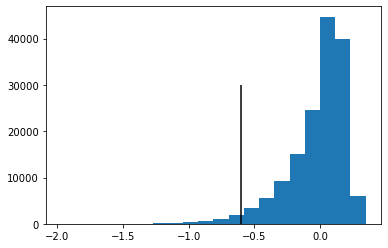

In [4]:
logN2 = np.log10(NII_Batt_int/Hbeta_Batt_int) 

# # upper branch
# u = np.where((logN2 > -0.6))[0]
# logN2up = logN2[u]

plt.hist(logN2, bins=20) #range=None, density=None, weights=None)
plt.vlines(-0.6,0,30000,'k')
plt.show()


# HaNII/OIII - Dust Dependence

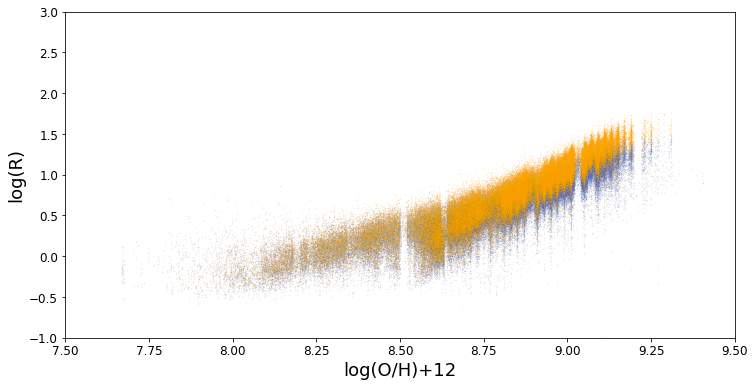

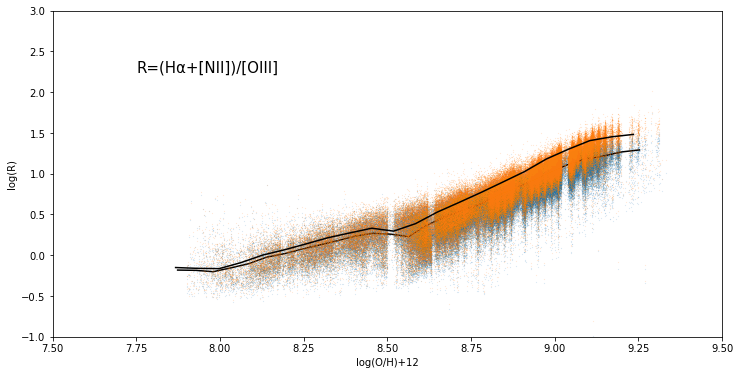

T04 Spearman, uncorrected: 0.9336824319114486
T04 Spearman, corrected: 0.9244552324543982


In [5]:
# Add poly fit
# Add Spearman correl
# Add error bars 

rint = np.log10((Halpha_Batt_int + NII_Batt_int) / OIII_Batt_int)
HaN2_O3_cor = rint
runc = np.log10((Halpha_Batt + NII_Batt) / OIII_Batt)
HaN2_O3_unc = runc

# metallicity, from SDSS
logOH_p50_Batt = BattistiSpecProp['logOH_p50']
tre_sdss = logOH_p50_Batt

# Log(r) error propagation 

plt.figure(figsize=(12, 6))
plt.scatter(logOH_p50_Batt, rint, s=.01, c='royalblue', marker='.')
plt.scatter(logOH_p50_Batt, runc, s=.01, c='orange', marker='.')
plt.xlim([8,9.5])
#plt.ylim([0,10])
plt.xlabel("log(O/H)+12",size=18)
plt.ylabel("log(R)",size=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-1,3)
plt.xlim(7.5,9.5)
#plt.text(8.2,6,"Ha+NII / OIII",size=22)
plt.show()

### Tremonti 2004 from SDSS
# corrected 
plt.figure(figsize=(12,6))
w = np.where((tre_sdss <9.35) &(tre_sdss > 7.9) & (HaN2_O3_cor > -5)& (HaN2_O3_cor < 5)&(np.isnan(HaN2_O3_cor) ==False))[0] 
HaN2_O3_cor1 = HaN2_O3_cor[w]
tre_sdsscor = tre_sdss[w]
plt.plot(tre_sdsscor, HaN2_O3_cor1, '.', markersize = .11)
#O3_HaN2_unc = O3_HaN2_Batt[w]
binwidth = 0.05
total_bins = int((max(tre_sdsscor) - min(tre_sdsscor)) / binwidth)
bins = np.linspace(min(tre_sdsscor), max(tre_sdsscor), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(tre_sdsscor, bins)
#print(max(O3_HaN2_cor[idx==8]), idx)
median = [np.percentile(HaN2_O3_cor1[idx==k+1], 50) for k in range(total_bins) if len(HaN2_O3_cor1[idx==k+1]) > 4]
perc1 = [np.percentile(HaN2_O3_cor1[idx==k+1], 16) for k in range(total_bins) if len(HaN2_O3_cor1[idx==k+1]) > 4]
perc2 = [np.percentile(HaN2_O3_cor1[idx==k+1], 84) for k in range(total_bins) if len(HaN2_O3_cor1[idx==k+1]) > 4]
x = [(bins[k]-delta/2) for k in range(total_bins) if len(HaN2_O3_cor1[idx==k+1]) > 4]
plt.plot(x, median, 'k-', linewidth=1.5)
#plt.plot(x, perc1, 'k--', linewidth=1.2)
#plt.plot(x, perc2, 'k--', linewidth=1.2)
# uncorrected
w = np.where((tre_sdss <9.35) &(tre_sdss > 7.9) & (HaN2_O3_unc > -5)& (HaN2_O3_unc < 5))[0] 
plt.plot(tre_sdss[w], HaN2_O3_unc[w], '.', markersize = 0.11)
HaN2_O3_unc1 = HaN2_O3_unc[w]
tre_sdssunc = tre_sdss[w]
#O3_HaN2_unc = O3_HaN2_Batt[w]
binwidth = 0.06
total_bins = int((max(tre_sdss[w]) - min(tre_sdss[w])) / binwidth)
bins = np.linspace(min(tre_sdss[w]), max(tre_sdss[w]), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(tre_sdss[w], bins)
#print(max(O3_HaN2_cor[idx==8]), idx)
median = [np.percentile(HaN2_O3_unc1[idx==k+1], 50) for k in range(total_bins) if len(HaN2_O3_unc1[idx==k+1]) > 4]
perc1 = [np.percentile(HaN2_O3_unc1[idx==k+1], 16) for k in range(total_bins) if len(HaN2_O3_unc1[idx==k+1]) > 4]
perc2 = [np.percentile(HaN2_O3_unc1[idx==k+1], 84) for k in range(total_bins) if len(HaN2_O3_unc1[idx==k+1]) > 4]
x = [(bins[k]-delta/2) for k in range(total_bins) if len(HaN2_O3_unc1[idx==k+1]) > 4]
plt.plot(x, median, 'k-', linewidth=1.5)
#plt.plot(x, perc1, 'k--', linewidth=1.2)
#plt.plot(x, perc2, 'k--', linewidth=1.2)

plt.text(7.75,2.25,'R=(H\u03B1+[NII])/[OIII]',fontsize=15)
plt.xlabel('log(O/H)+12')
plt.ylabel('log(R)')
plt.ylim(-1,3)
plt.xlim(7.5,9.5)
#plt.savefig("HbHaN2_O3.dustcomp.7.22.pdf",format="pdf")
plt.show()

## Spearman correlation
HaN2_O3_unc_spearman, p_value = stats.spearmanr(tre_sdssunc, HaN2_O3_unc1)
print('T04 Spearman, uncorrected:',HaN2_O3_unc_spearman)
## This one is not working. I'm wondering if it's because tre_sdss comes directly from the data frame, while Batt_int does as well
# but it has a calculation on it. How do I make them "talk" again?
HaN2_O3_cor_spearman, p_value = stats.spearmanr(tre_sdsscor, HaN2_O3_cor1)
print('T04 Spearman, corrected:',HaN2_O3_cor_spearman)



# HaNII/OIII Metallicity Diagnostic Comparisions

Goal: 
- Handful of subplots with y = log(ha+nII/OIII) (UNCORRECTED) and x = metallicity derived from a known diagnostic
- All should be in similar range as MAPPINGS theoretical plot
- Subplots have density contours
- Fit polynomial for y = log oh +12 (for each diag), x = log(ha+nII/OIII)

Metallicity Diagnostics

Ionization parameter, Log(U) ~ -3 for local star forming galaxies (Kewley 2019)

"The ionization parameter across normal star-forming galaxies is remarkably uniform. The dimensionless ionization parameter is typically −3.2 < logU < −2.9 for local Hii regions and starforming galaxies (Dopita et al. 2000, Moustakas et al. 2010, Poetrodjojo et al. 2018). The largest
ionization parameters in the local Universe are found in the largest star clusters, called super star
clusters. The super star clusters in M82 have ionization parameters up to log(U ) ∼ −2.3 (Förster
Schreiber et al. 2001, Smith et al. 2006)." (pg 526)

In [6]:
logU = -3

# 1 Tre 2004
Poly fit to the uncorrected data

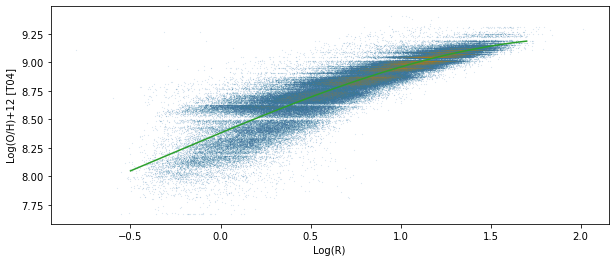

Polynomial coefficients for uncorrected line: [-0.04182391 -0.03691653  0.65765175  8.38061878]


Text(0, 0.5, 'log(R)')

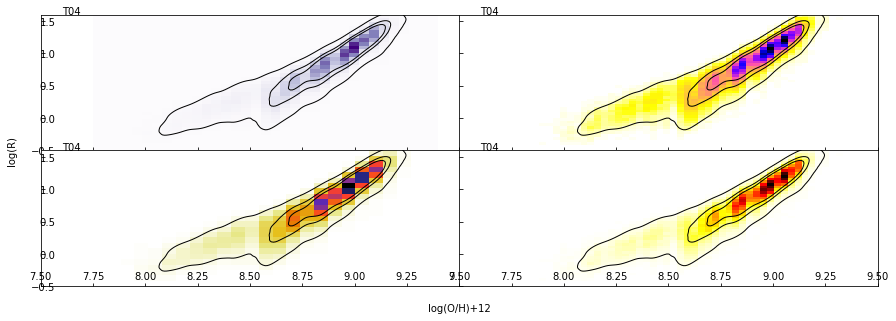

In [48]:
rint = np.log10((Halpha_Batt_int + NII_Batt_int) / OIII_Batt_int)
HaN2_O3_cor = rint
runc = np.log10((Halpha_Batt + NII_Batt) / OIII_Batt)
HaN2_O3_unc = runc

# metallicity, from SDSS
logOH_p50_Batt = BattistiSpecProp['logOH_p50']
tre_sdss = logOH_p50_Batt


## Poly fit

# y = T04 metallicity
# x = log r

# Uncorrected
w = np.where((tre_sdss <9.5) &(tre_sdss > 6.5) & (HaN2_O3_unc > -5)& (HaN2_O3_unc < 5)&(np.isnan(HaN2_O3_unc) ==False))[0] 
HaN2_O3_uncT04 = HaN2_O3_unc[w]
tre_sdss1 = tre_sdss[w] 
plt.figure(figsize=(10,4))
plt.plot(HaN2_O3_uncT04, tre_sdss1, '.', markersize = 0.11)
# poly fit unc
fit_T04_unc = np.polyfit(HaN2_O3_uncT04,tre_sdss1,3)
p1 = np.poly1d(fit_T04_unc)
t1 = np.linspace(-0.5,1.7, 5000)
plt.plot(HaN2_O3_uncT04,tre_sdss1,'.',t1, p1(t1), '-', markersize=.01)
#plt.xlim(6,9.5)
#plt.text(7.75,2, 'Dopita 2016')
plt.ylabel('Log(O/H)+12 [T04]')
plt.xlabel('Log(R)')
plt.show()
print("Polynomial coefficients for uncorrected line:", fit_T04_unc)


## Contour density plot
## For poly fitting

# # # # Try kernal density estimate 
# y1 = tre_sdss1
# x1 = HaN2_O3_uncT04
# # this is what takes a really long time
# #print(np.vstack([x,y]))
# #print(np.dstack([x,y]))
# # Peform the kernel density estimate
# X1, Y1 = np.mgrid[x1.min():x1.max():0.01, y1.min():y1.max():0.01] # after last : is step size. If add a j, makes it a complex
#   # number, and makes it the total number of steps you want
# positions = np.vstack([X1.ravel(), Y1.ravel()]) #.ravel flattens the array
# values = np.vstack([x1,y1]) # v stack makes a 2d array from tre and rint
# kernel = stats.gaussian_kde(values) # gaussian dist of tre and rint array
# Z1 = np.reshape(kernel(positions).T, X1.shape) # .reshape reshapes array, .T transposes, .shape shows dimensions of array
# z1 = Z1 / Z1.sum()
# n1 = 1000
# t1 = np.linspace(0, z1.max(), n1)
# integral = ((z1 >= t1[:, None, None]) * z1).sum(axis=(1,2))

# # plot
# plt.figure()
# plt.rcParams["figure.figsize"] = (14,6)
# from scipy import interpolate
# f1 = interpolate.interp1d(integral, t1)
# t_contours1 = f1(np.array([0.95,0.68,0.5]))
# plt.imshow(z1.T, origin='lower', extent=[x1.min(), x1.max(), y1.min(), y1.max()], cmap='BuPu')
# plt.contour(z1.T, t_contours1, extent=[x1.min(), x1.max(), y1.min(), y1.max()],colors=('k',),linewidths=(1,))
# #plt.imshow(z1.T, extent=[x1.min(), x1.max(), y1.min(), y1.max()], cmap='BuPu')
# # cmap is color scheme
# #plt.plot(x, y, 'k.', markersize=.05)
# # poly fit
# fit_T04_95 = np.polyfit(x1, y1, 3)
# p11 = np.poly1d(fit_T04_95)
# t11 = np.linspace(-0.2,1.6, 5000)
# plt.plot(x1, y1, '.',t11, p11(t11), '-', markersize=.01)# t1, p1(t1), '-')
# plt.xlim(-1,3)
# plt.ylim(7.5,9.5)
# plt.ylabel('log(O/H) +12 [T04]')
# plt.xlabel('log(R)')
# #plt.gcf().set_size_inches(14, 8)
# plt.show()
# print("Polynomial coefficients for uncorrected line, .95 percentile:", fit_T04_95)

#h, xbins, ybins = np.histogram2d(tre_sdss1, HaN2_O3_uncT04, bins=50, range=[[7.75, 9.4], [-0.5, 1.6]],density=True)#, normed=LogNorm())

x1 = tre_sdss1
y1 = HaN2_O3_uncT04
# Peform the kernel density estimate
X1, Y1 = np.mgrid[x1.min():x1.max():0.01, y1.min():y1.max():0.01] # after last : is step size. If add a j, makes it a complex
  # number, and makes it the total number of steps you want
positions = np.vstack([X1.ravel(), Y1.ravel()]) #.ravel flattens the array
values = np.vstack([x1,y1]) # v stack makes a 2d array from tre and rint
kernel = stats.gaussian_kde(values) # gaussian dist of tre and rint array
Z1 = np.reshape(kernel(positions).T, X1.shape) # .reshape reshapes array, .T transposes, .shape shows dimensions of array
z1 = Z1 / Z1.sum()
n1 = 1000
t1 = np.linspace(0, z1.max(), n1)
integral = ((z1 >= t1[:, None, None]) * z1).sum(axis=(1,2))
from scipy import interpolate
f1 = interpolate.interp1d(integral, t1)
t_contours1 = f1(np.array([0.95,0.68,0.5]))

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True,squeeze=True,figsize=(15, 5))
# T04
# plot
#axs[0, 0].plot(logOH_p50_Batt, runc, '.', markersize = .11)
#axs[0, 0].imshow(z1.T, origin='lower', extent=[x1.min(), x1.max(), y1.min(), y1.max()], cmap='BuPu')
axs[0, 0].contour(z1.T, t_contours1, extent=[x1.min(), x1.max(), y1.min(), y1.max()],colors=('k',),linewidths=(1,))
axs[0, 0].hist2d(tre_sdss1, HaN2_O3_uncT04, bins=35, range=[[7.75, 9.4], [-0.5, 1.6]],density=True,cmap='Purples')
axs[0, 0].text(7.6,1.6, 'T04')
axs[0, 0].tick_params(axis="y",direction="in", pad=-15)
axs[0, 0].tick_params(axis="x",direction="in", pad=-15)
# T04
#axs[1, 0].imshow(z1.T, origin='lower', extent=[x1.min(), x1.max(), y1.min(), y1.max()], cmap='BuPu')
axs[1, 0].contour(z1.T, t_contours1, extent=[x1.min(), x1.max(), y1.min(), y1.max()],colors=('k',),linewidths=(1,))
axs[1, 0].hist2d(tre_sdss1, HaN2_O3_uncT04, bins=25, range=[[7.75, 9.4], [-0.5, 1.6]],density=True,cmap='CMRmap_r')
#axs[1, 0].imshow(z1.T, origin='lower', extent=[x1.min(), x1.max(), y1.min(), y1.max()], cmap='BuPu')
axs[1, 0].text(7.6,1.6, 'T04')
axs[1, 0].tick_params(axis="y",direction="in", pad=-15)
axs[1, 0].tick_params(axis="x",direction="in", pad=-15)
#axs[0, 1].imshow(z1.T, origin='lower', extent=[x1.min(), x1.max(), y1.min(), y1.max()], cmap='BuPu')
axs[0, 1].contour(z1.T, t_contours1, extent=[x1.min(), x1.max(), y1.min(), y1.max()],colors=('k',),linewidths=(1,))
axs[0, 1].hist2d(tre_sdss1, HaN2_O3_uncT04, bins=50, range=[[7.75, 9.4], [-0.5, 1.6]],density=True,cmap='gnuplot2_r')
axs[0, 1].text(7.6,1.6, 'T04')
axs[0, 1].tick_params(axis="y",direction="in", pad=-15)
axs[0, 1].tick_params(axis="x",direction="in", pad=-15)
#axs[1, 1].imshow(z1.T, origin='lower', extent=[x1.min(), x1.max(), y1.min(), y1.max()], cmap='BuPu')
axs[1, 1].contour(z1.T, t_contours1, extent=[x1.min(), x1.max(), y1.min(), y1.max()],colors=('k',),linewidths=(1,))
axs[1, 1].hist2d(tre_sdss1, HaN2_O3_uncT04, bins=50, range=[[7.75, 9.4], [-0.5, 1.6]],density=True,cmap='hot_r')
axs[1, 1].text(7.6,1.6, 'T04')
axs[1, 1].tick_params(axis="y",direction="in", pad=-15)
axs[1, 1].tick_params(axis="x",direction="in", pad=-15)
plt.xlim(7.5,9.5)
plt.tick_params(axis="y",direction="in", pad=-22)
plt.tick_params(axis="x",direction="in", pad=-15)
#plt.setp(axs[1, 3].get_xticklabels()[7.5], visible=False)
plt.subplots_adjust(wspace=0.00, hspace=0.00)
# outer "subplot" for labels
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False,pad=0)
plt.xlabel("log(O/H)+12")
plt.ylabel("log(R)")





# 2 Dopita 2016

C:\Users\pheretz\AppData\Local\Temp\ipykernel_5720\3653124320.py:10: RuntimeWarning: divide by zero encountered in true_divide
  y = (np.log10(NII84_Batt_int/ SII_Batt_int)) + (0.264*np.log(NII84_Batt_int/Halpha_Batt_int))
C:\Users\pheretz\AppData\Local\Temp\ipykernel_5720\3653124320.py:10: RuntimeWarning: invalid value encountered in log10
  y = (np.log10(NII84_Batt_int/ SII_Batt_int)) + (0.264*np.log(NII84_Batt_int/Halpha_Batt_int))
C:\Users\pheretz\AppData\Local\Temp\ipykernel_5720\3653124320.py:13: RuntimeWarning: divide by zero encountered in true_divide
  y1 = (np.log10(NII84_Batt/ SII_Batt)) + (0.264*np.log(NII84_Batt/Halpha_Batt))
C:\Users\pheretz\AppData\Local\Temp\ipykernel_5720\3653124320.py:13: RuntimeWarning: invalid value encountered in log10
  y1 = (np.log10(NII84_Batt/ SII_Batt)) + (0.264*np.log(NII84_Batt/Halpha_Batt))


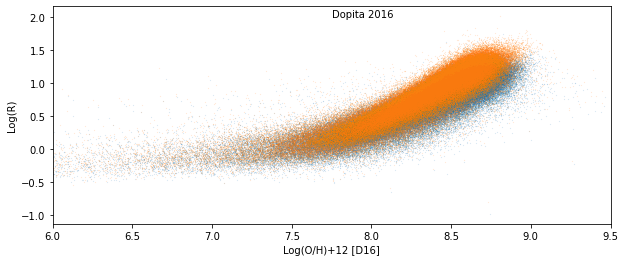

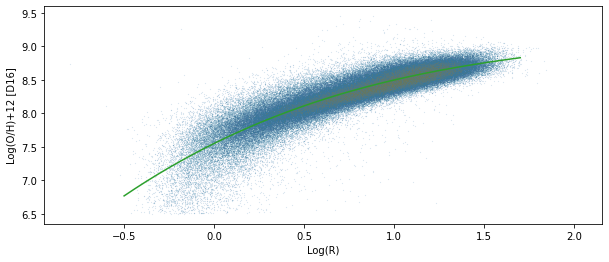

Polynomial coefficients for uncorrected line: [ 0.06079696 -0.44224322  1.32832187  7.55164327]


In [49]:
####
## Dopita 16 Metallicity calculation 
####

# log(O/H) +12 = 8.77 + y + 0.45(y+0.3)^5
# y = log(N2)/S2 + 0.264log(N2)/Ha

## SDSS
# corrected
y = (np.log10(NII84_Batt_int/ SII_Batt_int)) + (0.264*np.log(NII84_Batt_int/Halpha_Batt_int))
D16_int =  8.77 + y + 0.45*((y+0.3)**5)
# uncorrected
y1 = (np.log10(NII84_Batt/ SII_Batt)) + (0.264*np.log(NII84_Batt/Halpha_Batt))
D16_unc =  8.77 + y1 + 0.45*((y1+0.3)**5)
# values in a resonable range, but all around 8.7 and 8.8

## BASIC PLOT, with spearman correlation

plt.figure(figsize=(10,4))
plt.plot(D16_int, HaN2_O3_cor, '.', markersize = 0.11)
plt.plot(D16_unc, HaN2_O3_unc, '.', markersize = 0.11)
plt.xlim(6,9.5)
plt.text(7.75,2, 'Dopita 2016')
plt.xlabel('Log(O/H)+12 [D16]')
plt.ylabel('Log(R)')
plt.show()

# ## Spearman correlation
# HaN2_O3_unc_spearman, p_value = stats.spearmanr(D16_unc, HaN2_O3_unc)
# print('T04 Spearman, uncorrected:',HaN2_O3_unc_spearman)
# HaN2_O3_cor_spearman, p_value = stats.spearmanr(D16_int, HaN2_O3_cor)
# print('T04 Spearman, corrected:',HaN2_O3_cor_spearman)


## Poly fit

# y = D16 metallicity
# x = log r
# Corrected
# w = np.where((D16_int <9.5) &(D16_int > 6.5) & (HaN2_O3_cor > -5)& (HaN2_O3_cor < 5)&(np.isnan(HaN2_O3_cor) ==False))[0] 
# HaN2_O3_corD16 = HaN2_O3_cor[w]
# D16_intcor = D16_int[w] 
# plt.figure(figsize=(10,4))
# plt.plot(HaN2_O3_corD16, D16_intcor, '.', markersize = 0.11)
# # poly fit int
# fit_D16_int = np.polyfit(HaN2_O3_corD16, D16_intcor, 3)
# p1 = np.poly1d(fit_D16_int)
# t1 = np.linspace(-0.5,1.5, 5000)
# plt.plot(HaN2_O3_corD16, D16_intcor, '.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
# Uncorrected
w = np.where((D16_unc <9.5) &(D16_unc > 6.5) & (HaN2_O3_unc > -5)& (HaN2_O3_unc < 5)&(np.isnan(HaN2_O3_unc) ==False))[0] 
HaN2_O3_uncD16 = HaN2_O3_unc[w]
D16_unc1 = D16_unc[w] 
plt.figure(figsize=(10,4))
plt.plot(HaN2_O3_uncD16, D16_unc1, '.', markersize = 0.11)
# poly fit unc
fit_D16_unc = np.polyfit(HaN2_O3_uncD16,D16_unc1,3)
p1 = np.poly1d(fit_D16_unc)
t1 = np.linspace(-0.5,1.7, 5000)
plt.plot(HaN2_O3_uncD16,D16_unc1,'.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
#plt.xlim(6,9.5)
#plt.text(7.75,2, 'Dopita 2016')
plt.ylabel('Log(O/H)+12 [D16]')
plt.xlabel('Log(R)')
plt.show()
#print("Polynomial coefficients for corrected line:", fit_D16_int)
print("Polynomial coefficients for uncorrected line:", fit_D16_unc)


## Contour density plot
### for polynomial fitting

# # # Try kernal density estimate 
# y = D16_unc1
# x = HaN2_O3_uncD16
# # this is what takes a really long time
# #print(np.vstack([x,y]))
# #print(np.dstack([x,y]))
# # Peform the kernel density estimate
# X, Y = np.mgrid[x.min():x.max():0.01, y.min():y.max():0.01] # after last : is step size. If add a j, makes it a complex
#   # number, and makes it the total number of steps you want
# positions = np.vstack([X.ravel(), Y.ravel()]) #.ravel flattens the array
# values = np.vstack([x,y]) # v stack makes a 2d array from tre and rint
# kernel = stats.gaussian_kde(values) # gaussian dist of tre and rint array
# Z = np.reshape(kernel(positions).T, X.shape) # .reshape reshapes array, .T transposes, .shape shows dimensions of array

# z = Z / Z.sum()
# n = 1000
# t = np.linspace(0, z.max(), n)
# integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2))

# # plot
# plt.figure()
# plt.rcParams["figure.figsize"] = (14,6)
# from scipy import interpolate
# f = interpolate.interp1d(integral, t)
# t_contours = f(np.array([0.95,0.68,0.5]))
# #plt.imshow(z.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='BuPu')
# plt.contour(z.T, t_contours, extent=[x.min(), x.max(), y.min(), y.max()],colors=('k',),linewidths=(1,))
# #plt.imshow(z.T, extent=[x.min(), x.max(), y.min(), y.max()], cmap='BuPu')
# # cmap is color scheme
# #plt.plot(x, y, 'k.', markersize=.05)
# # poly fit
# fit_D16_95 = np.polyfit(x, y, 3)
# p1 = np.poly1d(fit_D16_95)
# t1 = np.linspace(-0.2,1.6, 5000)
# plt.plot(x, y, '.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
# #plt.xlim(-1,3)
# #plt.ylim(7.5,9.5)
# plt.ylabel('log(O/H) +12 [D16]')
# plt.xlabel('log(R)')
# #plt.gcf().set_size_inches(14, 8)
# plt.show()
# print("Polynomial coefficients for uncorrected line, .95 percentile:", fit_D16_95)

## For subplots down below (reversed)
# # Try kernal density estimate 
x2 = D16_unc1
y2 = HaN2_O3_uncD16
# this is what takes a really long time
#print(np.vstack([x,y]))
#print(np.dstack([x,y]))
# Peform the kernel density estimate
X2, Y2 = np.mgrid[x2.min():x2.max():0.01, y2.min():y2.max():0.01] # after last : is step size. If add a j, makes it a complex
  # number, and makes it the total number of steps you want
positions = np.vstack([X2.ravel(), Y2.ravel()]) #.ravel flattens the array
values = np.vstack([x2,y2]) # v stack makes a 2d array from tre and rint
kernel = stats.gaussian_kde(values) # gaussian dist of tre and rint array
Z2 = np.reshape(kernel(positions).T, X2.shape) # .reshape reshapes array, .T transposes, .shape shows dimensions of array

z2 = Z2 / Z2.sum()
n = 1000
t2 = np.linspace(0, z2.max(), n)
integral = ((z2 >= t2[:, None, None]) * z2).sum(axis=(1,2))

from scipy import interpolate
f2 = interpolate.interp1d(integral, t2)
t2_contours = f2(np.array([0.95,0.68,0.5]))


# 3 NII/Ha
"Instead, if only the red spectrum is available, we recommend the [Nii] λ6584/Hα ratio, which has a smaller (although not negligible) ionization parameter dependence; the [Nii]/Hα metallicity varies by ∼1 dex with ionization parameter. Several [Nii]/Hα calibrations are available (Storchi-Bergmann et al. 1994, Denicoló et al. 2002, Pettini & Pagel 2004). These calibrations are primarily based on the relationship between auroral metallicities and the [Nii]/Hα line ratio in local Hii regions and include a hidden assumption that the ionization parameter of the sample that the calibration is being applied to is the same as the mean ionization parameter of the Hii region sample that was used to derive the calibration. For highredshift galaxies, we recommend the use of an [Nii]/Hα calibration that includes a correction for ionization parameter, such as that in Table 2." - Kewley 2019

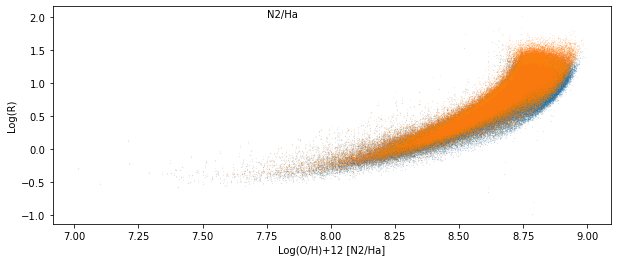

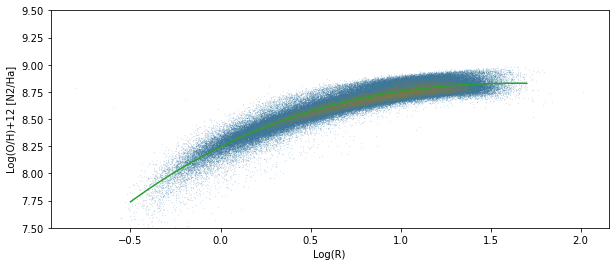

Polynomial coefficients for uncorrected line: [ 0.04233318 -0.35421659  0.82382177  8.24477769]


In [50]:
## N2/ Ha

N2Halogr_cor = np.log10(NII84_Batt_int / Halpha_Batt_int) 
N2Halogr_unc = np.log10(NII84_Batt / Halpha_Batt) 

#logoh12_N2Ha = 10.526 +1.9958*x -0.6741*y +0.2892*x*y + 0.5712*x**2 -0.6597*y**2 +0.0101*x*y**2 + 0.0800*y*x**2 +0.0782*x**3 -0.0982*y**3

# corrected
x = N2Halogr_cor
y = logU
logoh12_N2Ha_cor = 10.526 +1.9958*x -0.6741*y +0.2892*x*y + 0.5712*x**2 -0.6597*y**2 +0.0101*x*y**2 + 0.0800*y*x**2 +0.0782*x**3 -0.0982*y**3

# uncorrected
x = N2Halogr_unc
y = logU
logoh12_N2Ha_unc = 10.526 +1.9958*x -0.6741*y +0.2892*x*y + 0.5712*x**2 -0.6597*y**2 +0.0101*x*y**2 + 0.0800*y*x**2 +0.0782*x**3 -0.0982*y**3

## BASIC PLOT, with spearman correlation

plt.figure(figsize=(10,4))
plt.plot(logoh12_N2Ha_cor, HaN2_O3_cor, '.', markersize = 0.11)
plt.plot(logoh12_N2Ha_unc, HaN2_O3_unc, '.', markersize = 0.11)
#plt.xlim(7.5,9.5)
plt.text(7.75,2, 'N2/Ha')
plt.xlabel('Log(O/H)+12 [N2/Ha]')
plt.ylabel('Log(R)')
plt.show()

# ## Spearman correlation
# HaN2_O3_unc_spearman, p_value = stats.spearmanr(D16_unc, HaN2_O3_unc)
# print('T04 Spearman, uncorrected:',HaN2_O3_unc_spearman)
# HaN2_O3_cor_spearman, p_value = stats.spearmanr(D16_int, HaN2_O3_cor)
# print('T04 Spearman, corrected:',HaN2_O3_cor_spearman)


## Poly fit

# y = N202 metallicity
# x = log r
# # Corrected
# w = np.where((logoh12_N2Ha_cor <9.5) &(logoh12_N2Ha_cor > 6.5) & (HaN2_O3_cor > -5)& (HaN2_O3_cor < 5)&(np.isnan(HaN2_O3_cor) ==False))[0] 
# HaN2_O3_corN2Ha = HaN2_O3_cor[w]
# N2Ha_intcor = logoh12_N2Ha_cor[w] 
# plt.figure(figsize=(10,4))
# plt.plot(HaN2_O3_corN2Ha, N2Ha_intcor, '.', markersize = 0.11)
# # poly fit int
# fit_N2Ha_int = np.polyfit(HaN2_O3_corN2Ha, N2Ha_intcor, 3)
# p1 = np.poly1d(fit_N2Ha_int)
# t1 = np.linspace(-0.5,1.5, 5000)
# plt.plot(HaN2_O3_corN2Ha, N2Ha_intcor, '.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
# # Uncorrected
w = np.where((logoh12_N2Ha_unc <9.5) &(logoh12_N2Ha_unc > 6.5) & (HaN2_O3_unc > -5)& (HaN2_O3_unc < 5)&(np.isnan(HaN2_O3_unc) ==False))[0] 
HaN2_O3_uncN2Ha = HaN2_O3_unc[w]
logoh12_N2Ha_unc = logoh12_N2Ha_unc[w] 
plt.figure(figsize=(10,4))
plt.plot(HaN2_O3_uncN2Ha, logoh12_N2Ha_unc, '.', markersize = 0.11)
# poly fit unc
fit_N2Ha_unc = np.polyfit(HaN2_O3_uncN2Ha,logoh12_N2Ha_unc,3)
p1 = np.poly1d(fit_N2Ha_unc)
t1 = np.linspace(-0.5,1.7, 5000)
plt.plot(HaN2_O3_uncN2Ha,logoh12_N2Ha_unc,'.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
plt.ylim(7.5,9.5)
#plt.text(7.75,2, 'Dopita 2016')
plt.ylabel('Log(O/H)+12 [N2/Ha]')
plt.xlabel('Log(R)')
plt.show()
#print("Polynomial coefficients for corrected line:", fit_N2Ha_int)
print("Polynomial coefficients for uncorrected line:", fit_N2Ha_unc)

## Contour density plot

# # # Try kernal density estimate 
# y = logoh12_N2Ha_unc
# x = HaN2_O3_uncN2Ha
# # this is what takes a really long time
# #print(np.vstack([x,y]))
# #print(np.dstack([x,y]))
# # Peform the kernel density estimate
# X, Y = np.mgrid[x.min():x.max():0.01, y.min():y.max():0.01] # after last : is step size. If add a j, makes it a complex
#   # number, and makes it the total number of steps you want
# positions = np.vstack([X.ravel(), Y.ravel()]) #.ravel flattens the array
# values = np.vstack([x,y]) # v stack makes a 2d array from tre and rint
# kernel = stats.gaussian_kde(values) # gaussian dist of tre and rint array
# Z = np.reshape(kernel(positions).T, X.shape) # .reshape reshapes array, .T transposes, .shape shows dimensions of array

# z = Z / Z.sum()
# n = 1000
# t = np.linspace(0, z.max(), n)
# integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2))

# # plot
# plt.figure()
# plt.rcParams["figure.figsize"] = (14,6)
# from scipy import interpolate
# f = interpolate.interp1d(integral, t)
# t_contours = f(np.array([0.95,0.68,0.5]))
# #plt.imshow(z.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='BuPu')
# plt.contour(z.T, t_contours, extent=[x.min(), x.max(), y.min(), y.max()],colors=('k',),linewidths=(1,))
# #plt.imshow(z.T, extent=[x.min(), x.max(), y.min(), y.max()], cmap='BuPu')
# # cmap is color scheme
# #plt.plot(x, y, 'k.', markersize=.05)
# # poly fit
# fit_N2Ha_95 = np.polyfit(x, y, 3)
# p1 = np.poly1d(fit_N2Ha_95)
# t1 = np.linspace(-0.2,1.6, 5000)
# plt.plot(x, y, '.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
# #plt.xlim(-1,3)
# plt.ylim(7.5,9.5)
# plt.ylabel('log(O/H) +12 [N2/Ha]')
# plt.xlabel('log(R)')
# #plt.gcf().set_size_inches(14, 8)
# plt.show()
# print("Polynomial coefficients for uncorrected line, .95 percentile:", fit_N2Ha_95)

# 4 R23
"The most commonly used theoretical optical metallicity diagnostic is the oxygen R23 ratio (R23 =
{[Oii] λλ3727, 9 + [Oiii] λλ4959, 5007}/Hβ), first proposed by Pagel et al. (1979). Many theoretical calibrations of this ratio now exist (e.g., McGaugh 1991, Oey & Shields 2000, Kewley &
Dopita 2002, Kobulnicky & Kewley 2004). Skillman (1989) was first to show that the relationship
between R23 and metallicity depends on ionization parameter. Most subsequent theoretical calibrations included a correction for ionization parameter. The R23 ratio is relatively insensitive to
the ionization parameter at metallicities above log(O/H) + 12 > 8.5 because the [Oiii] and [Oii]
lines have opposite dependencies on ionization parameter, which are roughly cancelled out. The
R23 ratio is sensitive to the ISM pressure for high metallicities [log(O/H) + 12 > 8.5] and should
be used in conjunction with an ISM pressure diagnostic." - Kewley 2019

** Want uncorrected H23, CORRECTED R23

-3


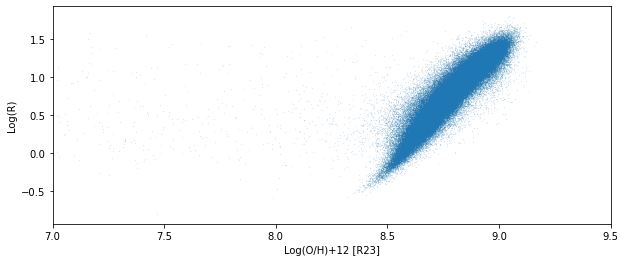

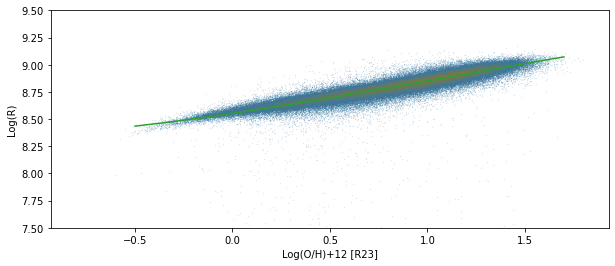

Polynomial coefficients for uncorrected line: [-0.01498807  0.04981905  0.26406656  8.55277408]


In [51]:
####
## R23 Metallicity calculation 
####

## R23 relationship
# 12+log(O/H) = 9.185-0.313x-0.264x^2 - 0.321x^3
# corrected
w = np.where((np.isnan(OII_Batt_int) ==False)&(OII_Batt_int > 0)&(np.isnan(OIII_Batt_int) ==False)&(OIII_Batt_int > 0)&(np.isnan(Hbeta_Batt_int) ==False)&(Hbeta_Batt_int > 0))[0] 
OII_Batt_int1 = OII_Batt_int[w]
OIII_Batt_int1 = OIII_Batt_int[w]
Hbeta_Batt_int1 = Hbeta_Batt_int[w]
NII_Batt_int1 = NII_Batt_int[w]
HaN2_O3_uncR23 = HaN2_O3_unc[w]

R23_cor = np.log10((OII_Batt_int1 + OIII_Batt_int1)/Hbeta_Batt_int1)
#R23_cor = 9.185-(0.313*R23_cor)-(0.264*(R23_cor**2)) - (0.321*(R23_cor**3))
# Uncorrected

# w = np.where((np.isnan(OII_Batt) ==False)&(OII_Batt > 0)&(np.isnan(OIII_Batt) ==False)&(OIII_Batt > 0)&(np.isnan(Hbeta_Batt) ==False)&(Hbeta_Batt > 0))[0] 
# OII_Batt_unc1 = OII_Batt[w]
# OIII_Batt_unc1 = OIII_Batt[w]
# Hbeta_Batt_unc1 = Hbeta_Batt[w]
# HaN2_O3_unc1 = HaN2_O3_unc[w]

# R23_unc = np.log10((OII_Batt_unc1 + OIII_Batt_unc1)/Hbeta_Batt_unc1)
#R23_unc = np.log10((OII_Batt + OIII_Batt)/Hbeta_Batt)
#R23_unc = 9.185-(0.313*R23_unc)-(0.264*(R23_unc**2)) - (0.321*(R23_unc**3))


## from Kewley 2019

#corrected
# w = np.where((np.isnan(R23_cor) ==False)&(HaN2_O3_cor > -5)& (HaN2_O3_cor < 5)&(np.isnan(HaN2_O3_cor) ==False))[0] 
# HaN2_O3_cor1 = HaN2_O3_cor[w]
# R23_cor = R23_cor[w] 
x = R23_cor
y = logU
logoh12_R23_cor = 9.7757 -0.5059*x +0.9707*y -0.1744*x*y -0.0255*(x**2) + 0.3838*(y**2) -0.0378*x*(y**2) + 0.0806*y*(x**2) -0.0852*(x**3) + 0.0462*(y**3)
# uncorrected
### DOESN'T MAKE SENSE TO USE UNCORRECTED R23, NEEDS DUST CORRECTION
# x = R23_unc
# y = logU
# logoh12_R23_unc = 9.7757 -0.5059*x +0.9707*y -0.1744*x*y -0.0255*(x**2) + 0.3838*(y**2) -0.0378*x*(y**2) + 0.0806*y*(x**2) -0.0852*(x**3) + 0.0462*(y**3)

print(y)

## BASIC PLOT, with spearman correlation

plt.figure(figsize=(10,4))
plt.plot(logoh12_R23_cor, HaN2_O3_uncR23, '.', markersize = 0.11)
#plt.plot(logoh12_R23_unc, HaN2_O3_unc1, '.', markersize = 0.11)
plt.xlim(7,9.5)
#plt.text(7.75,2, 'R23')
plt.xlabel('Log(O/H)+12 [R23]')
plt.ylabel('Log(R)')
plt.show()

# ## Spearman correlation
# HaN2_O3_unc_spearman, p_value = stats.spearmanr(D16_unc, HaN2_O3_unc)
# print('T04 Spearman, uncorrected:',HaN2_O3_unc_spearman)
# HaN2_O3_cor_spearman, p_value = stats.spearmanr(D16_int, HaN2_O3_cor)
# print('T04 Spearman, corrected:',HaN2_O3_cor_spearman)

w = np.where((logoh12_R23_cor <9.5) &(logoh12_R23_cor > 6.5) & (HaN2_O3_uncR23 > -5)& (HaN2_O3_uncR23 < 5)&(np.isnan(HaN2_O3_uncR23) ==False))[0] 
HaN2_O3_uncR23 = HaN2_O3_uncR23[w]
logoh12_R23_cor = logoh12_R23_cor[w] 

plt.figure(figsize=(10,4))
plt.plot(HaN2_O3_uncR23, logoh12_R23_cor, '.', markersize = 0.11)
# poly fit unc
fit_R23 = np.polyfit(HaN2_O3_uncR23,logoh12_R23_cor,3)
p1 = np.poly1d(fit_R23)
t1 = np.linspace(-0.5,1.7, 5000)
plt.plot(HaN2_O3_uncR23,logoh12_R23_cor,'.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
plt.ylim(7.5,9.5)
#plt.text(7.75,2, 'Dopita 2016')
plt.xlabel('Log(O/H)+12 [R23]')
plt.ylabel('Log(R)')
plt.show()
print("Polynomial coefficients for uncorrected line:", fit_R23)



# ## Contour density plot
## For the polynomial fit

# # # Try kernal density estimate 
# y = logoh12_R23_cor
# x = HaN2_O3_uncR23
# # this is what takes a really long time
# #print(np.vstack([x,y]))
# #print(np.dstack([x,y]))
# # Peform the kernel density estimate
# X, Y = np.mgrid[x.min():x.max():0.01, y.min():y.max():0.01] # after last : is step size. If add a j, makes it a complex
#   # number, and makes it the total number of steps you want
# positions = np.vstack([X.ravel(), Y.ravel()]) #.ravel flattens the array
# values = np.vstack([x,y]) # v stack makes a 2d array from tre and rint
# kernel = stats.gaussian_kde(values) # gaussian dist of tre and rint array
# Z = np.reshape(kernel(positions).T, X.shape) # .reshape reshapes array, .T transposes, .shape shows dimensions of array

# z = Z / Z.sum()
# n = 1000
# t = np.linspace(0, z.max(), n)
# integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2))

# # plot
# plt.figure()
# plt.rcParams["figure.figsize"] = (14,6)
# from scipy import interpolate
# f = interpolate.interp1d(integral, t)
# t_contours = f(np.array([0.95,0.68,0.5]))
# #plt.imshow(z.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='BuPu')
# plt.contour(z.T, t_contours, extent=[x.min(), x.max(), y.min(), y.max()],colors=('k',),linewidths=(1,))
# #plt.imshow(z.T, extent=[x.min(), x.max(), y.min(), y.max()], cmap='BuPu')
# # cmap is color scheme
# #plt.plot(x, y, 'k.', markersize=.05)
# # poly fit
# fit_R23_95 = np.polyfit(x, y, 3)
# p1 = np.poly1d(fit_R23_95)
# t1 = np.linspace(-0.2,1.6, 5000)
# plt.plot(x, y, '.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
# #plt.xlim(-1,3)
# #plt.ylim(7.5,9.5)
# plt.ylabel('log(O/H) +12 [R23]')
# plt.xlabel('log(R)')
# #plt.gcf().set_size_inches(14, 8)
# plt.show()
# print("Polynomial coefficients for uncorrected line, .95 percentile:", fit_R23_95)


## contours for the subplots below
# # Try kernal density estimate 
x4 = logoh12_R23_cor
y4 = HaN2_O3_uncR23
# this is what takes a really long time
#print(np.vstack([x,y]))
#print(np.dstack([x,y]))
# Peform the kernel density estimate
X4, Y4 = np.mgrid[x4.min():x4.max():0.01, y4.min():y4.max():0.01] # after last : is step size. If add a j, makes it a complex
  # number, and makes it the total number of steps you want
positions4 = np.vstack([X4.ravel(), Y4.ravel()]) #.ravel flattens the array
values4 = np.vstack([x4,y4]) # v stack makes a 2d array from tre and rint
kernel4 = stats.gaussian_kde(values4) # gaussian dist of tre and rint array
Z4 = np.reshape(kernel4(positions4).T, X4.shape) # .reshape reshapes array, .T transposes, .shape shows dimensions of array

z4 = Z4 / Z4.sum()
n = 1000
t4 = np.linspace(0, z4.max(), n)
integral4 = ((z4 >= t4[:, None, None]) * z4).sum(axis=(1,2))

from scipy import interpolate
f4 = interpolate.interp1d(integral4, t4)
t4_contours = f4(np.array([0.95,0.68,0.5]))

# 5 N2O2
"The [Nii]/[Oii] ratio, based on the [Nii] λ6584 and [Oii] λλ3727, 9 lines, is by far the most reliable metallicity diagnostic in the optical spectrum, with no dependence on ionization parameter,
and only marginal dependence on the ISM pressure for 4 ≤ log(P/k) ≤ 8. Several simple optical [Nii]/[Oii] metallicity calibrations have been developed ( Jensen et al. 1976, Dopita & Evans
1986, Kewley & Dopita 2002). The [Nii]/[Oii] ratio is highly sensitive to metallicity thanks to the
primary and secondary nature of nitrogen plus the temperature sensitivity of the [Oii] line. The
optical [Nii]/[Oii] ratio is insensitive to ionization parameter and depends on ISM pressure only at
the highest metallicities [log(O/H) + 12 ≥ 9.23] and at the highest ISM pressures [log(P/k) > 8].
The [Nii]/[Oii] ratio is also the least sensitive optical diagnostic to the presence of an AGN or
DIG (Kewley et al. 2006a, Zhang et al. 2017)." -Kewley 2019

** Use corrected N202

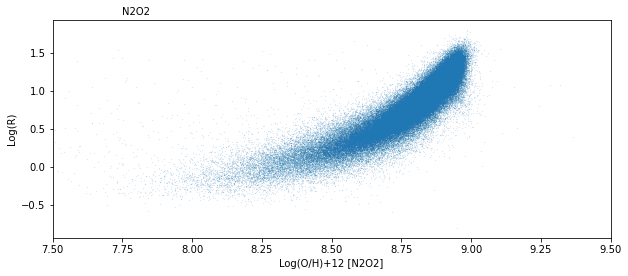

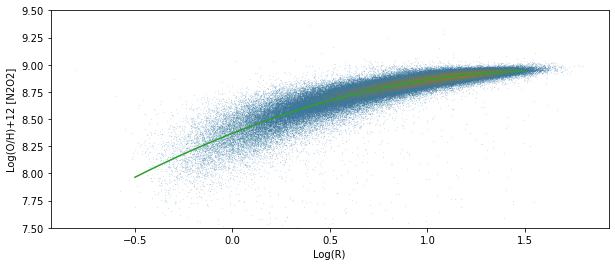

Polynomial coefficients for corrected line: [-7.40328101e-03 -2.06030354e-01  7.06800151e-01  8.36914896e+00]


In [52]:
####
## N2O2 Metallicity calculation 
####

w = np.where((np.isnan(OII_Batt_int) ==False)&(OII_Batt_int > 0)&(np.isnan(NII84_Batt_int) ==False)&(NII84_Batt_int > 0))[0] 
OII_Batt_int1 = OII_Batt_int[w]
NII84_Batt_int1 = NII84_Batt_int[w]
HaN2_O3_uncN2O2 = HaN2_O3_unc[w]

## N2O2 relationship
N2O2logr_cor = np.log10(NII84_Batt_int1 / OII_Batt_int1) 
#N2O2logr_unc = np.log10(NII84_Batt / OII_Batt)

# corrected
x = N2O2logr_cor
y = logU
logoh12_N2O2_cor = 9.4772 + 1.1797*x +0.5085*y + 0.6879*x*y + 0.2807*x**2 + 0.1612*y**2 + 0.1187*x*y**2 + 0.12*y*x**2 + 0.2293*x**3 + 0.0164*y**3

# # uncorrected
# # DOESN'T MAKE SENSE TO USE UNCORRECTED TREND, NEEDS DUST CORRECTION
# x = N2O2logr_unc
# y = logU
# logoh12_N2O2_unc = 9.4772 + 1.1797*x +0.5085*y + 0.6879*x*y + 0.2807*x**2 + 0.1612*y**2 + 0.1187*x*y**2 + 0.12*y*x**2 + 0.2293*x**3 + 0.0164*y**3

## BASIC PLOT, with spearman correlation

plt.figure(figsize=(10,4))
plt.plot(logoh12_N2O2_cor, HaN2_O3_uncN2O2, '.', markersize = 0.11)
#plt.plot(logoh12_N2O2_unc, HaN2_O3_unc, '.', markersize = 0.11)
plt.xlim(7.5,9.5)
plt.text(7.75,2, 'N2O2')
plt.xlabel('Log(O/H)+12 [N2O2]')
plt.ylabel('Log(R)')
plt.show()

# ## Spearman correlation
# HaN2_O3_unc_spearman, p_value = stats.spearmanr(D16_unc, HaN2_O3_unc)
# print('T04 Spearman, uncorrected:',HaN2_O3_unc_spearman)
# HaN2_O3_cor_spearman, p_value = stats.spearmanr(D16_int, HaN2_O3_cor)
# print('T04 Spearman, corrected:',HaN2_O3_cor_spearman)


## Poly fit

# y = N202 metallicity
# x = log r
# Corrected
w = np.where((logoh12_N2O2_cor <9.5) &(logoh12_N2O2_cor > 6.5) & (HaN2_O3_uncN2O2 > -5)& (HaN2_O3_uncN2O2 < 5)&(np.isnan(HaN2_O3_uncN2O2) ==False))[0] 
HaN2_O3_uncN2O2 = HaN2_O3_uncN2O2[w]
N2O2_intcor = logoh12_N2O2_cor[w] 
plt.figure(figsize=(10,4))
plt.plot(HaN2_O3_uncN2O2, N2O2_intcor, '.', markersize = 0.11)
# poly fit int
fit_N2O2_int = np.polyfit(HaN2_O3_uncN2O2, N2O2_intcor, 3)
p1 = np.poly1d(fit_N2O2_int)
t1 = np.linspace(-0.5,1.5, 5000)
plt.plot(HaN2_O3_uncN2O2, N2O2_intcor, '.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
# # # Uncorrected
# w = np.where((logoh12_N2O2_unc <9.5) &(logoh12_N2O2_unc > 6.5) & (HaN2_O3_unc > -5)& (HaN2_O3_unc < 5)&(np.isnan(HaN2_O3_unc) ==False))[0] 
# HaN2_O3_unc1 = HaN2_O3_unc[w]
# logoh12_N2O2_unc1 = logoh12_N2O2_unc[w] 
# plt.figure(figsize=(10,4))
# plt.plot(HaN2_O3_unc1, logoh12_N2O2_unc1, '.', markersize = 0.11)
# # poly fit unc
# fit_N2O2_unc = np.polyfit(HaN2_O3_unc1,logoh12_N2O2_unc1,3)
# p1 = np.poly1d(fit_N2O2_unc)
# t1 = np.linspace(-0.5,1.7, 5000)
# plt.plot(HaN2_O3_unc1,logoh12_N2O2_unc1,'.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
plt.ylim(7.5,9.5)
#plt.text(7.75,2, 'Dopita 2016')
plt.ylabel('Log(O/H)+12 [N2O2]')
plt.xlabel('Log(R)')
plt.show()
print("Polynomial coefficients for corrected line:", fit_N2O2_int)

## Contour density plot

# # # # Try kernal density estimate 
# y = N2O2_intcor
# x = HaN2_O3_uncN2O2
# # this is what takes a really long time
# #print(np.vstack([x,y]))
# #print(np.dstack([x,y]))
# # Peform the kernel density estimate
# X, Y = np.mgrid[x.min():x.max():0.01, y.min():y.max():0.01] # after last : is step size. If add a j, makes it a complex
#   # number, and makes it the total number of steps you want
# positions = np.vstack([X.ravel(), Y.ravel()]) #.ravel flattens the array
# values = np.vstack([x,y]) # v stack makes a 2d array from tre and rint
# kernel = stats.gaussian_kde(values) # gaussian dist of tre and rint array
# Z = np.reshape(kernel(positions).T, X.shape) # .reshape reshapes array, .T transposes, .shape shows dimensions of array

# z = Z / Z.sum()
# n = 1000
# t = np.linspace(0, z.max(), n)
# integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2))

# # plot
# plt.figure()
# plt.rcParams["figure.figsize"] = (14,6)
# from scipy import interpolate
# f = interpolate.interp1d(integral, t)
# t_contours = f(np.array([0.95,0.68,0.5]))
# #plt.imshow(z.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='BuPu')
# plt.contour(z.T, t_contours, extent=[x.min(), x.max(), y.min(), y.max()],colors=('k',),linewidths=(1,))
# #plt.imshow(z.T, extent=[x.min(), x.max(), y.min(), y.max()], cmap='BuPu')
# # cmap is color scheme
# #plt.plot(x, y, 'k.', markersize=.05)
# # poly fit
# fit_N2O2_95 = np.polyfit(x, y, 3)
# p1 = np.poly1d(fit_N2O2_95)
# t1 = np.linspace(-0.2,1.6, 5000)
# plt.plot(x, y, '.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
# #plt.xlim(-1,3)
# plt.ylim(7.5,9.5)
# plt.ylabel('log(O/H) +12 [N2O2]')
# plt.xlabel('log(R)')
# #plt.gcf().set_size_inches(14, 8)
# plt.show()
# print("Polynomial coefficients for uncorrected line, .95 percentile:", fit_N2O2_95)

# 6 O2S2

"The [Oii] λλ3727, 9/[Sii] λλ6717, 31 ratio was proposed by Dopita & Evans (1986) as a
metallicity diagnostic. This ratio is less sensitive to the ionization parameter than the [Sii]/Hα
ratio and is useful for metallicities of log(O/H) + 12 > 8.2. However, if the full optical spectrum is available to calculate this ratio, we recommend the use of the [Nii]/[Oii] ratio instead because the [Nii]/[Oii] ratio is considerably less sensitive to the ionization parameter and ISM pressure." - Kewley 2019

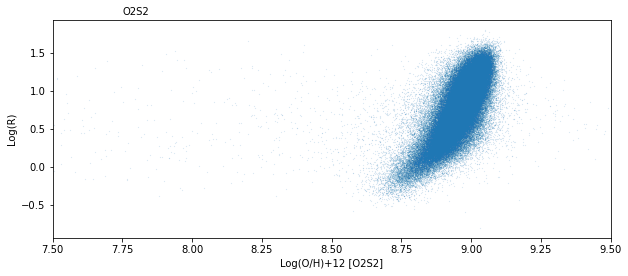

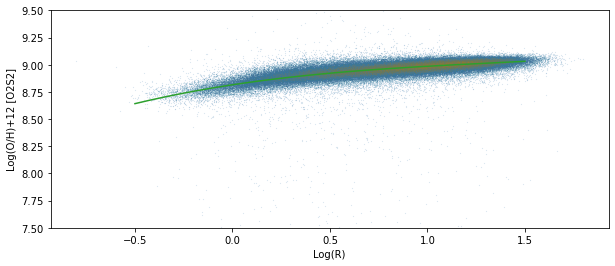

Polynomial coefficients for uncorrected line: [ 0.03250039 -0.13413578  0.27196833  8.81562217]


In [53]:
## O2 / S2 (doublets)

# DOES NOT MAKE SENSE TO USE UNCORRECTED LINE, LINES FAR APART

w = np.where((np.isnan(OII_Batt_int) ==False)&(OII_Batt_int > 0)&(np.isnan(SII_Batt_int) ==False)&(SII_Batt_int > 0))[0] 
OII_Batt_int1 = OII_Batt_int[w]
SII_Batt_int1 = SII_Batt_int[w]
HaN2_O3_uncO2S2 = HaN2_O3_unc[w]

O2S2logr_cor = np.log10(OII_Batt_int1 / SII_Batt_int1) 
#O2S2logr_unc = np.log10(OII_Batt / SII_Batt) 

#logoh12_O2S2 = 12.4894 -3.2646*x +3.2581*y -2.0544*x*y + 0.5282*x**2 +1.073*y**2 -0.3445*x*y**2 + 0.2130*y*x**2 -0.3047*x**3 +0.1209*y**3

# corrected
x = O2S2logr_cor
y = logU
logoh12_O2S2_cor = 12.4894 -3.2646*x +3.2581*y -2.0544*x*y + 0.5282*x**2 +1.073*y**2 -0.3445*x*y**2 + 0.2130*y*x**2 -0.3047*x**3 +0.1209*y**3

# # uncorrected
# x = O2S2logr_unc
# y = logU
# logoh12_O2S2_unc = 12.4894 -3.2646*x +3.2581*y -2.0544*x*y + 0.5282*x**2 +1.073*y**2 -0.3445*x*y**2 + 0.2130*y*x**2 -0.3047*x**3 +0.1209*y**3

## BASIC PLOT, with spearman correlation
w = np.where((np.isnan(logoh12_O2S2_cor) ==False)&(HaN2_O3_uncO2S2 > -5)& (HaN2_O3_uncO2S2 < 5)&(np.isnan(HaN2_O3_uncO2S2) ==False))[0] 
HaN2_O3_uncO2S2 = HaN2_O3_uncO2S2[w]
logoh12_O2S2_cor = logoh12_O2S2_cor[w] 
# # uncorrected
# w = np.where((np.isnan(logoh12_O2S2_unc) ==False)&(HaN2_O3_unc > -5)& (HaN2_O3_unc < 5)&(np.isnan(HaN2_O3_unc) ==False))[0] 
# HaN2_O3_unc1 = HaN2_O3_unc[w]
# logoh12_O2S2_unc = logoh12_O2S2_unc[w] 

plt.figure(figsize=(10,4))
plt.plot(logoh12_O2S2_cor, HaN2_O3_uncO2S2, '.', markersize = 0.11)
#plt.plot(logoh12_O2S2_unc, HaN2_O3_unc1, '.', markersize = 0.11)
plt.xlim(7.5,9.5)
plt.text(7.75,2, 'O2S2')
plt.xlabel('Log(O/H)+12 [O2S2]')
plt.ylabel('Log(R)')
plt.show()

# ## Spearman correlation
# HaN2_O3_unc_spearman, p_value = stats.spearmanr(D16_unc, HaN2_O3_unc)
# print('T04 Spearman, uncorrected:',HaN2_O3_unc_spearman)
# HaN2_O3_cor_spearman, p_value = stats.spearmanr(D16_int, HaN2_O3_cor)
# print('T04 Spearman, corrected:',HaN2_O3_cor_spearman)


## Poly fit

# y = N202 metallicity
# x = log r
# Corrected
w = np.where((logoh12_O2S2_cor <9.5) &(logoh12_O2S2_cor > 6.5) & (HaN2_O3_uncO2S2 > -5)& (HaN2_O3_uncO2S2 < 5)&(np.isnan(HaN2_O3_uncO2S2) ==False))[0] 
HaN2_O3_uncO2S2 = HaN2_O3_uncO2S2[w]
logoh12_O2S2_cor = logoh12_O2S2_cor[w] 
plt.figure(figsize=(10,4))
plt.plot(HaN2_O3_uncO2S2, logoh12_O2S2_cor, '.', markersize = 0.11)
# poly fit int
fit_O2S2_int = np.polyfit(HaN2_O3_uncO2S2, logoh12_O2S2_cor, 3)
p1 = np.poly1d(fit_O2S2_int)
t1 = np.linspace(-0.5,1.5, 5000)
plt.plot(HaN2_O3_uncO2S2, logoh12_O2S2_cor, '.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
plt.ylim(7.5,9.5)
#plt.text(7.75,2, 'Dopita 2016')
plt.ylabel('Log(O/H)+12 [O2S2]')
plt.xlabel('Log(R)')
plt.show()
print("Polynomial coefficients for uncorrected line:", fit_O2S2_int)

## Contour density plot

# # # # Try kernal density estimate 
# y = logoh12_O2S2_cor
# x = HaN2_O3_uncO2S2
# # this is what takes a really long time
# #print(np.vstack([x,y]))
# #print(np.dstack([x,y]))
# # Peform the kernel density estimate
# X, Y = np.mgrid[x.min():x.max():0.01, y.min():y.max():0.01] # after last : is step size. If add a j, makes it a complex
#   # number, and makes it the total number of steps you want
# positions = np.vstack([X.ravel(), Y.ravel()]) #.ravel flattens the array
# values = np.vstack([x,y]) # v stack makes a 2d array from tre and rint
# kernel = stats.gaussian_kde(values) # gaussian dist of tre and rint array
# Z = np.reshape(kernel(positions).T, X.shape) # .reshape reshapes array, .T transposes, .shape shows dimensions of array

# z = Z / Z.sum()
# n = 1000
# t = np.linspace(0, z.max(), n)
# integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2))

# # plot
# plt.figure()
# plt.rcParams["figure.figsize"] = (14,6)
# from scipy import interpolate
# f = interpolate.interp1d(integral, t)
# t_contours = f(np.array([0.95,0.68,0.5]))
# #plt.imshow(z.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='BuPu')
# plt.contour(z.T, t_contours, extent=[x.min(), x.max(), y.min(), y.max()],colors=('k',),linewidths=(1,))
# #plt.imshow(z.T, extent=[x.min(), x.max(), y.min(), y.max()], cmap='BuPu')
# # cmap is color scheme
# #plt.plot(x, y, 'k.', markersize=.05)
# # poly fit
# fit_O2S2_95 = np.polyfit(x, y, 3)
# p1 = np.poly1d(fit_O2S2_95)
# t1 = np.linspace(-0.2,1.6, 5000)
# plt.plot(x, y, '.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
# #plt.xlim(-1,3)
# plt.ylim(7.5,9.5)
# plt.ylabel('log(O/H) +12 [O2S2]')
# plt.xlabel('log(R)')
# #plt.gcf().set_size_inches(14, 8)
# plt.show()
# print("Polynomial coefficients for uncorrected line, .95 percentile:", fit_O2S2_95)

# 7 SCAL - R  # 8 SCAL -S
- Need to determine which branch SDSS galaxies fall within, logN2 = -0.6 is the divinding line
- OII line not available in SDSS beyond z = 0.2
- Try both the R and S calibration

N2 Histogram

140181


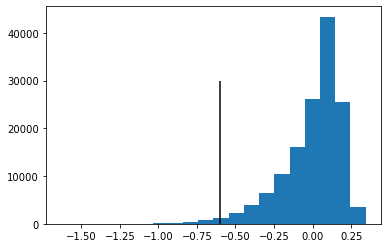

138331


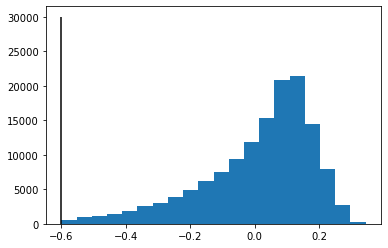

0.9868027764104979


In [54]:
w = np.where((np.isnan(OII_Batt_int) ==False)&(OII_Batt_int > 0)&(np.isnan(SII_Batt_int) ==False)&(SII_Batt_int > 0)&(np.isnan(NII_Batt_int) ==False)&(NII_Batt_int > 0)&(np.isnan(Hbeta_Batt_int) ==False)&(Hbeta_Batt_int > 0) )[0] 
NII_Batt_int1 = NII_Batt_int[w]
Hbeta_Batt_int1 = Hbeta_Batt_int[w]
OIII_Batt_int1 = OIII_Batt_int[w]
OII_Batt_int1 = OII_Batt_int[w]
SII_Batt_int1 = SII_Batt_int[w]
HaN2_O3_uncN2 = HaN2_O3_unc[w]

## confirmed that this looks the same just after dust correction at the top

## Most SDSS galaxies in the upper branch:
#  149160 / 152831 = 0.97598
# ~ 98%

logN2 = np.log10(NII_Batt_int1/Hbeta_Batt_int1) 

print(len(logN2))

plt.hist(logN2, bins=20) #range=None, density=None, weights=None)
plt.vlines(-0.6,0,30000,'k')
plt.show()

# upper branch
u = np.where((logN2 > -0.6))[0]
logN2up = logN2[u]

print(len(logN2up))


plt.hist(logN2up, bins=20) #range=None, density=None, weights=None)
plt.vlines(-0.6,0,30000,'k')
plt.show()

print(len(logN2up)/(len(logN2)))

R and S Calibrations

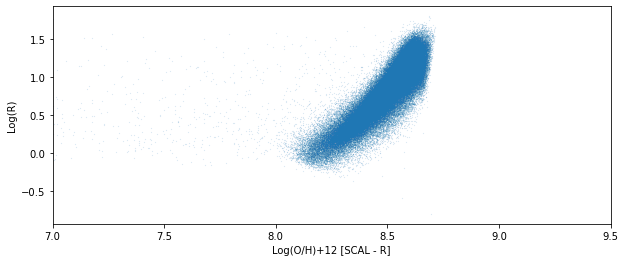

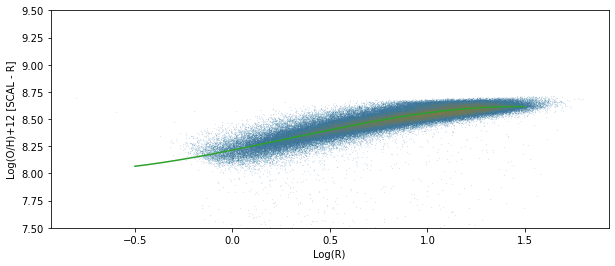

Polynomial coefficients for uncorrected line: [-0.09028909  0.07476209  0.3575892   8.21488797]


In [55]:
# R Calibration

# R2 = OII + / Hb
# R3 = OIII + / Hb

# log(R3/R2)
logR3R2_upper = np.log10( (OIII_Batt_int1[u]/Hbeta_Batt_int1[u])/ (OII_Batt_int1[u]/Hbeta_Batt_int1[u]) )
logR2_upper = np.log10( (OII_Batt_int1[u]/Hbeta_Batt_int1[u]) )
logN2_upper = logN2[u]
HaN2_O3_uncSCALR = HaN2_O3_uncN2[u]

logOHr_upper = 8.589 + 0.022*logR3R2_upper + 0.399*logN2_upper + (-0.137 + 0.164*logR3R2_upper + 0.589*logN2_upper)*logR2_upper

## BASIC PLOT, with spearman correlation

plt.figure(figsize=(10,4))
plt.plot(logOHr_upper, HaN2_O3_uncSCALR , '.', markersize = 0.11)
plt.xlim(7,9.5)
#plt.text(7.75,2, 'R23')
plt.xlabel('Log(O/H)+12 [SCAL - R]')
plt.ylabel('Log(R)')
plt.show()


## Poly fit

# y = SCAL metallicity
# x = log r
# Corrected
w = np.where((logOHr_upper <9.5) &(logOHr_upper > 6.5) & (HaN2_O3_uncSCALR > -5)& (HaN2_O3_uncSCALR < 5)&(np.isnan(HaN2_O3_uncSCALR) ==False))[0] 
HaN2_O3_uncSCALR = HaN2_O3_uncSCALR[w]
logOHr_upper = logOHr_upper[w] 
plt.figure(figsize=(10,4))
plt.plot(HaN2_O3_uncSCALR, logOHr_upper, '.', markersize = 0.11)
# poly fit int
fit_SCALR_int = np.polyfit(HaN2_O3_uncSCALR, logOHr_upper, 3)
p1 = np.poly1d(fit_SCALR_int)
t1 = np.linspace(-0.5,1.5, 5000)
plt.plot(HaN2_O3_uncSCALR, logOHr_upper, '.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
plt.ylim(7.5,9.5)
#plt.text(7.75,2, 'Dopita 2016')
plt.ylabel('Log(O/H)+12 [SCAL - R]')
plt.xlabel('Log(R)')
plt.show()
print("Polynomial coefficients for uncorrected line:", fit_SCALR_int)

## Contour density plot

# # # # Try kernal density estimate 
# y = logoh12_O2S2_cor
# x = HaN2_O3_uncO2S2
# # this is what takes a really long time
# #print(np.vstack([x,y]))
# #print(np.dstack([x,y]))
# # Peform the kernel density estimate
# X, Y = np.mgrid[x.min():x.max():0.01, y.min():y.max():0.01] # after last : is step size. If add a j, makes it a complex
#   # number, and makes it the total number of steps you want
# positions = np.vstack([X.ravel(), Y.ravel()]) #.ravel flattens the array
# values = np.vstack([x,y]) # v stack makes a 2d array from tre and rint
# kernel = stats.gaussian_kde(values) # gaussian dist of tre and rint array
# Z = np.reshape(kernel(positions).T, X.shape) # .reshape reshapes array, .T transposes, .shape shows dimensions of array

# z = Z / Z.sum()
# n = 1000
# t = np.linspace(0, z.max(), n)
# integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2))

# # plot
# plt.figure()
# plt.rcParams["figure.figsize"] = (14,6)
# from scipy import interpolate
# f = interpolate.interp1d(integral, t)
# t_contours = f(np.array([0.95,0.68,0.5]))
# #plt.imshow(z.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='BuPu')
# plt.contour(z.T, t_contours, extent=[x.min(), x.max(), y.min(), y.max()],colors=('k',),linewidths=(1,))
# #plt.imshow(z.T, extent=[x.min(), x.max(), y.min(), y.max()], cmap='BuPu')
# # cmap is color scheme
# #plt.plot(x, y, 'k.', markersize=.05)
# # poly fit
# fit_O2S2_95 = np.polyfit(x, y, 3)
# p1 = np.poly1d(fit_O2S2_95)
# t1 = np.linspace(-0.2,1.6, 5000)
# plt.plot(x, y, '.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
# #plt.xlim(-1,3)
# plt.ylim(7.5,9.5)
# plt.ylabel('log(O/H) +12 [O2S2]')
# plt.xlabel('log(R)')
# #plt.gcf().set_size_inches(14, 8)
# plt.show()
# print("Polynomial coefficients for uncorrected line, .95 percentile:", fit_O2S2_95)


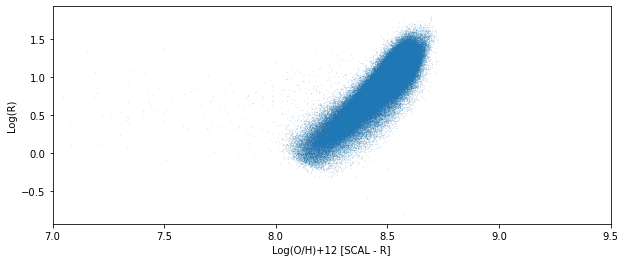

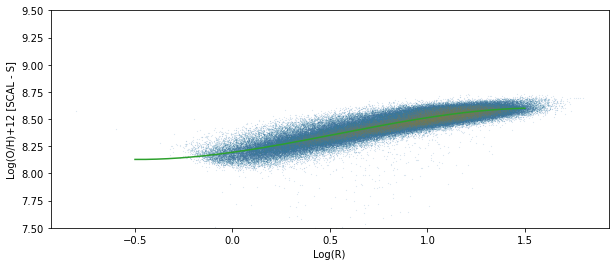

Polynomial coefficients for uncorrected line: [-0.1106718   0.18011195  0.24915428  8.19462292]


In [56]:
# S calibration

# S2 = SII + / Hb
# R3 = OIII + / Hb

# log(R3/R2)
logR3S2_upper = np.log10( (OIII_Batt_int1[u]/Hbeta_Batt_int1[u])/ (SII_Batt_int1[u]/Hbeta_Batt_int1[u]) )
logS2_upper = np.log10( (SII_Batt_int1[u]/Hbeta_Batt_int1[u]) )
logN2_upper = logN2[u]
HaN2_O3_uncSCALS = HaN2_O3_uncN2[u]

logOHs_upper = 8.424 + 0.03*logR3S2_upper + 0.751*logN2_upper + (-0.349 + 0.182*logR3S2_upper + 0.508*logN2_upper)*logS2_upper

## BASIC PLOT, with spearman correlation

plt.figure(figsize=(10,4))
plt.plot(logOHs_upper, HaN2_O3_uncSCALS , '.', markersize = 0.11)
plt.xlim(7,9.5)
#plt.text(7.75,2, 'R23')
plt.xlabel('Log(O/H)+12 [SCAL - R]')
plt.ylabel('Log(R)')
plt.show()

## Poly fit

# y = SCAL metallicity
# x = log r
# Corrected
w = np.where((logOHs_upper <9.5) &(logOHs_upper > 6.5) & (HaN2_O3_uncSCALS > -5)& (HaN2_O3_uncSCALS < 5)&(np.isnan(HaN2_O3_uncSCALS) ==False))[0] 
HaN2_O3_uncSCALS = HaN2_O3_uncSCALS[w]
logOHs_upper = logOHs_upper[w] 
plt.figure(figsize=(10,4))
plt.plot(HaN2_O3_uncSCALS, logOHs_upper, '.', markersize = 0.11)
# poly fit int
fit_SCALS_int = np.polyfit(HaN2_O3_uncSCALS, logOHs_upper, 3)
p1 = np.poly1d(fit_SCALS_int)
t1 = np.linspace(-0.5,1.5, 5000)
plt.plot(HaN2_O3_uncSCALS, logOHs_upper, '.',t1, p1(t1), '-', markersize=.01)# t1, p1(t1), '-')
plt.ylim(7.5,9.5)
#plt.text(7.75,2, 'Dopita 2016')
plt.ylabel('Log(O/H)+12 [SCAL - S]')
plt.xlabel('Log(R)')
plt.show()
print("Polynomial coefficients for uncorrected line:", fit_SCALS_int)


# Plot with Diagnostics subplots
Goal: Subplots with the above diagnostic comparisons 
Contours
x = metallicity
y = logR
Show mappings? 

Text(0, 0.5, 'log(R)')

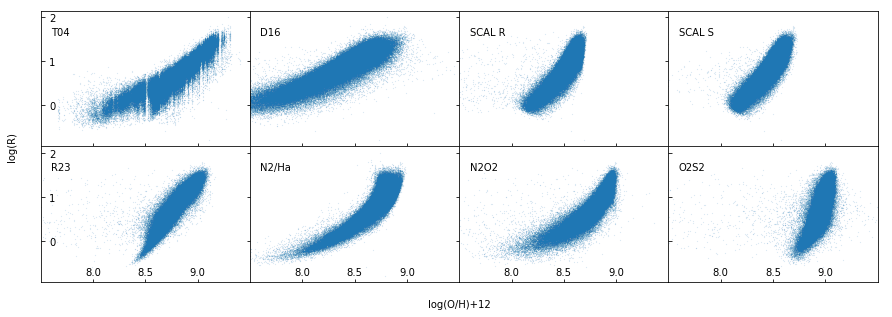

In [57]:
from matplotlib.ticker import MaxNLocator

# 8 as of now
# 4 x 2 plot

# x = diagnostic, corrected when needed
# y = H23, uncorrected 


fig, axs = plt.subplots(2, 4, sharex=True, sharey=True,squeeze=True,figsize=(15, 5))
# T04
axs[0, 0].plot(logOH_p50_Batt, runc, '.', markersize = .11)
# axs[0, 0].imshow(z1.T, origin='lower', extent=[x1.min(), x1.max(), y1.min(), y1.max()], cmap='BuPu')
# axs[0, 0].contour(z1.T, t_contours1, extent=[x1.min(), x1.max(), y1.min(), y1.max()],colors=('k',),linewidths=(1,))
axs[0, 0].text(7.6,1.6, 'T04')
axs[0, 0].tick_params(axis="y",direction="in", pad=-15)
axs[0, 0].tick_params(axis="x",direction="in", pad=-15)
# D16
axs[0, 1].plot( D16_unc1,HaN2_O3_uncD16, '.', markersize = 0.11)
axs[0, 1].text(7.6,1.6, 'D16')
axs[0, 1].tick_params(axis="x",direction="in", pad=-15)
# SCAL R
axs[0, 2].plot(logOHr_upper, HaN2_O3_uncSCALR , '.', markersize = 0.11)
axs[0, 2].text(7.6,1.6, 'SCAL R')
axs[0, 2].tick_params(axis="x",direction="in", pad=-15)
# SCAL S
axs[0, 3].plot(logOHs_upper, HaN2_O3_uncSCALS , '.', markersize = 0.11)
axs[0, 3].text(7.6,1.6, 'SCAL S')
axs[0, 3].tick_params(axis="x",direction="in", pad=-15)
# R23
axs[1, 0].plot( logoh12_R23_cor,HaN2_O3_uncR23, '.', markersize = 0.11)
axs[1, 0].text(7.6,1.6, 'R23')
axs[1, 0].tick_params(axis="y",direction="in", pad=-15)
axs[1, 0].tick_params(axis="x",direction="in", pad=-15)
axs[1, 0].set_xticks([8.0,8.5,9.0])
# N2/HA
axs[1, 1].plot( logoh12_N2Ha_unc,HaN2_O3_uncN2Ha, '.', markersize = 0.11)
axs[1, 1].text(7.6,1.6, 'N2/Ha')
axs[1, 1].tick_params(axis="x",direction="in", pad=-15)
# N2O2
axs[1, 2].plot( N2O2_intcor,HaN2_O3_uncN2O2, '.', markersize = 0.11)
axs[1, 2].text(7.6,1.6, 'N2O2')
axs[1, 2].tick_params(axis="x",direction="in", pad=-15)
# O2S2
axs[1, 3].plot(logoh12_O2S2_cor, HaN2_O3_uncO2S2, '.', markersize = 0.11)
axs[1, 3].text(7.6,1.6, 'O2S2')
axs[1, 3].tick_params(axis="x",direction="in", pad=-15)
plt.xlim(7.5,9.5)
plt.tick_params(axis="y",direction="in", pad=-22)
plt.tick_params(axis="x",direction="in", pad=-15)
#plt.setp(axs[1, 3].get_xticklabels()[7.5], visible=False)
plt.subplots_adjust(wspace=0.00, hspace=0.00)
# outer "subplot" for labels
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False,pad=0)
plt.xlabel("log(O/H)+12")
plt.ylabel("log(R)")

# Plot with Diagnostics contour subplots

Text(0, 0.5, 'log(R)')

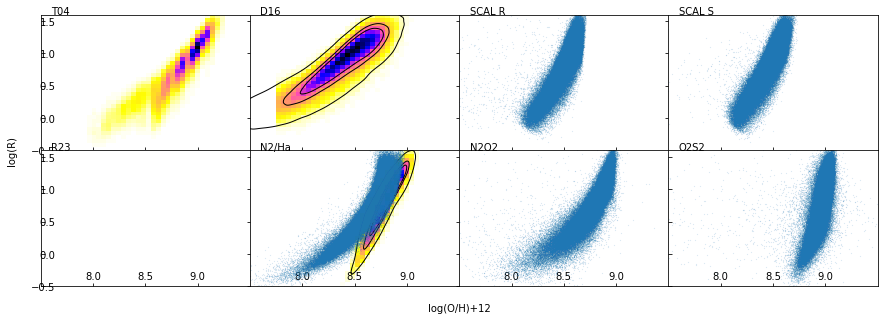

In [58]:

fig, axs = plt.subplots(2, 4, sharex=True, sharey=True,squeeze=True,figsize=(15, 5))
# T04
axs[0, 0].contour(z1.T, t_contours1, extent=[x1.min(), x1.max(), y1.min(), y1.max()],colors=('k',),linewidths=(1,))
axs[0, 0].hist2d(tre_sdss1, HaN2_O3_uncT04, bins=35, range=[[7.75, 9.4], [-0.5, 1.6]],density=True,cmap='gnuplot2_r')
#axs[0, 0].plot(logOH_p50_Batt, runc, '.', markersize = .11)
axs[0, 0].text(7.6,1.6, 'T04')
axs[0, 0].tick_params(axis="y",direction="in", pad=-15)
axs[0, 0].tick_params(axis="x",direction="in", pad=-15)
axs[0, 0].set_yticks([-0.5,0,0.5,1.0,1.5])
# D16
#axs[0, 1].plot( D16_unc1,HaN2_O3_uncD16, '.', markersize = 0.11)
axs[0, 1].contour(z2.T, t2_contours, extent=[x2.min(), x2.max(), y2.min(), y2.max()],colors=('k',),linewidths=(1,))
axs[0, 1].hist2d(D16_unc1,HaN2_O3_uncD16, bins=35, range=[[7.75, 9.4], [-0.5, 1.6]],density=True,cmap='gnuplot2_r')
axs[0, 1].text(7.6,1.6, 'D16')
axs[0, 1].tick_params(axis="x",direction="in", pad=-15)
# SCAL R
axs[0, 2].plot(logOHr_upper, HaN2_O3_uncSCALR , '.', markersize = 0.11)
axs[0, 2].text(7.6,1.6, 'SCAL R')
axs[0, 2].tick_params(axis="x",direction="in", pad=-15)
# SCAL S
axs[0, 3].plot(logOHs_upper, HaN2_O3_uncSCALS , '.', markersize = 0.11)
axs[0, 3].text(7.6,1.6, 'SCAL S')
axs[0, 3].tick_params(axis="x",direction="in", pad=-15)
# R23
#axs[1, 0].plot( logoh12_R23_cor,HaN2_O3_uncR23, '.', markersize = 0.11)
axs[1, 0].contour(z4.T, t4_contours, extent=[x4.min(), x4.max(), y4.min(), y4.max()],colors=('k',),linewidths=(1,))
axs[1, 0].hist2d(logoh12_R23_cor,HaN2_O3_uncR23, bins=35, range=[[7.5, 9.4], [-0.5, 1.6]],density=True,cmap='gnuplot2_r')
axs[1, 0].text(7.6,1.6, 'R23')
axs[1, 0].tick_params(axis="y",direction="in", pad=-15)
axs[1, 0].tick_params(axis="x",direction="in", pad=-15)
axs[1, 0].set_xticks([8.0,8.5,9.0])
axs[1, 0].set_yticks([-0.5,0,0.5,1.0,1.5])
# N2/HA
axs[1, 1].plot( logoh12_N2Ha_unc,HaN2_O3_uncN2Ha, '.', markersize = 0.11)
axs[1, 1].text(7.6,1.6, 'N2/Ha')
axs[1, 1].tick_params(axis="x",direction="in", pad=-15)
# N2O2
axs[1, 2].plot( N2O2_intcor,HaN2_O3_uncN2O2, '.', markersize = 0.11)
axs[1, 2].text(7.6,1.6, 'N2O2')
axs[1, 2].tick_params(axis="x",direction="in", pad=-15)
# O2S2
axs[1, 3].plot(logoh12_O2S2_cor, HaN2_O3_uncO2S2, '.', markersize = 0.11)
axs[1, 3].text(7.6,1.6, 'O2S2')
axs[1, 3].tick_params(axis="x",direction="in", pad=-15)
plt.xlim(7.5,9.5)
plt.tick_params(axis="y",direction="in", pad=-22)
plt.tick_params(axis="x",direction="in", pad=-15)
#plt.setp(axs[1, 3].get_xticklabels()[7.5], visible=False)
plt.subplots_adjust(wspace=0.00, hspace=0.00)
# outer "subplot" for labels
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False,pad=0)
plt.xlabel("log(O/H)+12")
plt.ylabel("log(R)")


Polynomial fitting x = diag y = HaNII/OIII

# Preliminary High Redshift Data and MAPPINGS

In [ ]:
# add MAPPINGS

## Pull in MAPPINGS model parameters
print(BPASS.dtype.names)

# Each line in the ratio is logged. So need to consider thant when creating the ratio values. 
# Lines are over Ha, so need to cancel out Ha 

BPASS = np.loadtxt('grid_bpass_P6.csv', skiprows=1, delimiter=',')
logQ_model = BPASS[:,0]
stellarage_model =BPASS[:,1]
metal_model = BPASS[:,2]
pressure_model = BPASS[:,6]

# Logged values!
N2_Ha_model = BPASS[:,8]  # NII doublet
N2_O2p_model = BPASS[:,11] # NII, OII doublet
O2p_Hb_model = BPASS[:,14] # OII doublet 
O3_Hb_model = BPASS[:,16]  # OIII doublet
O32_model = BPASS[:,17]  # OIII / OII doublet
R23_model = BPASS[:,25]  # OIII doub + OII doub / Hb
Ha_Hb_model = BPASS[:,35]

# Radius of spherical clouds
rad = BPASS[:,31]
rmax = BPASS[:,32]
remp = BPASS[:,33]

LHb_model = BPASS[:,30]  # Hbeta luminosity
Hb_model = LHb_model / (4*np.pi*rmax**2) # Hbeta flux

# converting logged line ratios 
N2_Hb_model = N2_Ha_model + Ha_Hb_model  # log(NII/Hb)
Ha_model = Ha_Hb_model + Hb_model # log(Ha)
N2_model = N2_Hb_model + Hb_model # log(N2)
N2Ha_model = np.log10(10**N2_model + 10**Ha_model) # log(N2 + Ha)
O3_model = O3_Hb_model + Hb_model # log(OIII)
O3Hb_model = np.log10(10**O3_model + 10**Hb_model) # log(o3 + Hb)
HaN2Hb_model = np.log10(10**N2_model + 10**Ha_model + 10**Hb_model) # log(N2 + Ha +Hb)

## Model ratios 
## (Ha + NII) / OIII
HaN2_O3_model = np.log10(10**N2_Hb_model + 10**Ha_Hb_model) - O3_Hb_model
HaN2_O3_model2 = N2Ha_model - O3_model

Qlist = np.unique(logQ_model)
Qlist_names = [6.5,7.0,7.5,8.0,8.5,9.0,9.5]
Zlist = np.unique(metal_model)

# uncorrected
HaN2_O3_unc = np.log10((NII_Batt + Halpha_Batt) / OIII_Batt)
# corrected
HaN2_O3_cor = np.log10((NII_Batt_int + Halpha_Batt_int) / OIII_Batt_int)

tre_sdss = logOH_p50_Batt

### Tremonti 2004 from SDSS
# corrected 
plt.figure(figsize=(12,6))
w = np.where((tre_sdss <9.35) &(tre_sdss > 7.9) & (HaN2_O3_cor > -5)& (HaN2_O3_cor < 5)&(np.isnan(HaN2_O3_cor) ==False))[0] 
HaN2_O3_cor1 = HaN2_O3_cor[w]
tre_sdsscor = tre_sdss[w]
plt.plot(tre_sdsscor, HaN2_O3_cor1, '.', markersize = .11)
#O3_HaN2_unc = O3_HaN2_Batt[w]
binwidth = 0.05
total_bins = int((max(tre_sdsscor) - min(tre_sdsscor)) / binwidth)
bins = np.linspace(min(tre_sdsscor), max(tre_sdsscor), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(tre_sdsscor, bins)
#print(max(O3_HaN2_cor[idx==8]), idx)
median = [np.percentile(HaN2_O3_cor1[idx==k+1], 50) for k in range(total_bins) if len(HaN2_O3_cor1[idx==k+1]) > 4]
perc1 = [np.percentile(HaN2_O3_cor1[idx==k+1], 16) for k in range(total_bins) if len(HaN2_O3_cor1[idx==k+1]) > 4]
perc2 = [np.percentile(HaN2_O3_cor1[idx==k+1], 84) for k in range(total_bins) if len(HaN2_O3_cor1[idx==k+1]) > 4]
x = [(bins[k]-delta/2) for k in range(total_bins) if len(HaN2_O3_cor1[idx==k+1]) > 4]
plt.plot(x, median, 'k-', linewidth=1.5)
#plt.plot(x, perc1, 'k--', linewidth=1.2)
#plt.plot(x, perc2, 'k--', linewidth=1.2)
# uncorrected
w = np.where((tre_sdss <9.35) &(tre_sdss > 7.9) & (HaN2_O3_unc > -5)& (HaN2_O3_unc < 5))[0] 
#plt.plot(tre_sdss[w], HaN2_O3_unc[w], '.', markersize = 0.11)
HaN2_O3_unc1 = HaN2_O3_unc[w]
tre_sdssunc = tre_sdss[w]
#O3_HaN2_unc = O3_HaN2_Batt[w]
binwidth = 0.06
total_bins = int((max(tre_sdss[w]) - min(tre_sdss[w])) / binwidth)
bins = np.linspace(min(tre_sdss[w]), max(tre_sdss[w]), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(tre_sdss[w], bins)
#print(max(O3_HaN2_cor[idx==8]), idx)
median = [np.percentile(HaN2_O3_unc1[idx==k+1], 50) for k in range(total_bins) if len(HaN2_O3_unc1[idx==k+1]) > 4]
perc1 = [np.percentile(HaN2_O3_unc1[idx==k+1], 16) for k in range(total_bins) if len(HaN2_O3_unc1[idx==k+1]) > 4]
perc2 = [np.percentile(HaN2_O3_unc1[idx==k+1], 84) for k in range(total_bins) if len(HaN2_O3_unc1[idx==k+1]) > 4]
x = [(bins[k]-delta/2) for k in range(total_bins) if len(HaN2_O3_unc1[idx==k+1]) > 4]
#plt.plot(x, median, 'k-', linewidth=1.5)
#plt.plot(x, perc1, 'k--', linewidth=1.2)
#plt.plot(x, perc2, 'k--', linewidth=1.2)
## model
for i in range(len(Zlist)):
    w = np.where((metal_model == Zlist[i]) & (stellarage_model==1))[0]
    plt.plot(metal_model[w], HaN2_O3_model[w], '-', c='k')
plt.plot(metal_model[w], HaN2_O3_model[w], '-', c='k')#, label='Age=1Myr')
    
for j in range(len(Qlist)):
    w = np.where((logQ_model==Qlist[j]) & (stellarage_model==1))[0]
    plt.plot(metal_model[w], HaN2_O3_model[w], '-',label=Qlist_names[j])
    plt.legend(title="log(q)")#(ncols=2, 
#plt.legend(handles=[lab1,lab2],loc='lower right')
plt.text(7.75,2.25,'R=(H\u03B1+[NII])/[OIII]',fontsize=15)
plt.xlabel('log(O/H)+12')
plt.ylabel('log(R)')
plt.ylim(-1,3)
plt.xlim(7.5,9.5)
#plt.savefig("HbHaN2_O3.dustcomp.7.22.pdf",format="pdf")
plt.show()

# O3N2
"Pettini & Pagel proposed a calibration called O3N2 that uses the [Oiii]/Hβ and
[Nii]/Hα ratios (O3N2 = [Oiii] λ5007/Hβ)/([Nii] λ6584/Hα). This calibration is based on a combination of auroral metallicities and photoionization models and was developed for spectra of
high-redshift galaxies in which flux calibration and extinction correction are difficult. Figure 9
shows that the O3N2 ratio has a strong dependence on the ionization parameter, varying by 2–3
orders of magnitude across the entire metallicity range. We do not recommend the use of the
O3N2 ratio, especially at high redshift where the ionization parameter is usually significantly
larger than in nearby Hii regions. Instead, if only the red spectrum is available, we recommend
the [Nii] λ6584/Hα ratio, which has a smaller (although not negligible) ionization parameter dependence; the [Nii]/Hα metallicity varies by ∼1 dex with ionization parameter. Several [Nii]/Hα
calibrations are available (Storchi-Bergmann et al. 1994, Denicoló et al. 2002, Pettini & Pagel
2004). These calibrations are primarily based on the relationship between auroral metallicities
and the [Nii]/Hα line ratio in local Hii regions and include a hidden assumption that the ionization parameter of the sample that the calibration is being applied to is the same as the mean
ionization parameter of the Hii region sample that was used to derive the calibration. For highredshift galaxies, we recommend the use of an [Nii]/Hα calibration that includes a correction for
ionization parameter, such as that in Table 2." - Kewley 2019

In [ ]:
logU = -3

## O3N2 (R = [OIII]λ5007/Hβ/[NII]λ6584/Hα
# 12 + log (O/H) = 8.533[±0.012] − 0.214[±0.012] × O3N2
O3N2logr_cor = np.log10( (OIII5007_Batt_int/Hbeta_Batt_int) / (NII84_Batt_int / Halpha_Batt_int)) 
O3N2_cor = 8.533 - 0.214*O3N2logr_cor

x = O3N2logr_cor
y = logU

logoh12_O3N2 = 10.312 -1.6575*x +2.2525*y -1.3594*x*y + 0.4764*x**2 + 1.1730*y**2 -0.2968*x*y**2 + 0.1974*y*x**2 -0.0544*x**3 + 0.1891*y**3

O3N2logr_unc = np.log10( (OIII5007_Batt/Hbeta_Batt) / (NII84_Batt / Halpha_Batt)) 
O3N2_unc = 8.533 - 0.214*O3N2logr_unc

## BASIC PLOT, with spearman correlation

plt.figure(figsize=(10,4))
#plt.plot(logoh12_N2Ha_cor, HaN2_O3_cor, '.', markersize = 0.11)
plt.plot(logoh12_O3N2, HaN2_O3_unc, '.', markersize = 0.11)
plt.xlim(7.5,9.5)
plt.text(7.75,2, 'O3N2')
plt.xlabel('Log(O/H)+12 [O3N2]')
plt.ylabel('Log(R)')
plt.show()